In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
convert = pd.read_csv('/Users/judithha/Desktop/GAWB_Wave.csv')

In [3]:
convert.columns

Index(['Record', 'OEM', 'CC', 'ListenerPrefs', 'StreamingHrs', 'EverStreamed',
       'PrevDD', 'IncomeOver75k', 'DeactFinancial', 'DeactNotListening',
       'DeactValue', 'DiscountAtDeact', 'Tenure', 'Wave_Activation'],
      dtype='object')

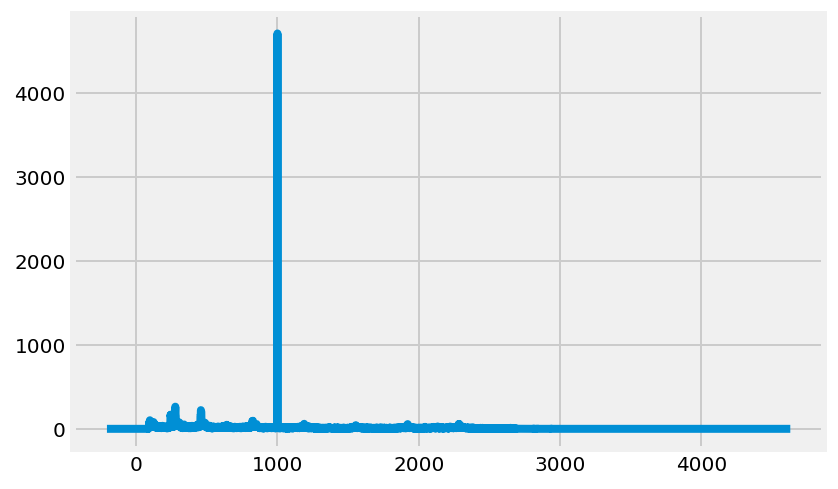

In [4]:
convert.Tenure.value_counts().sort_index().plot();
#Tenure is in days

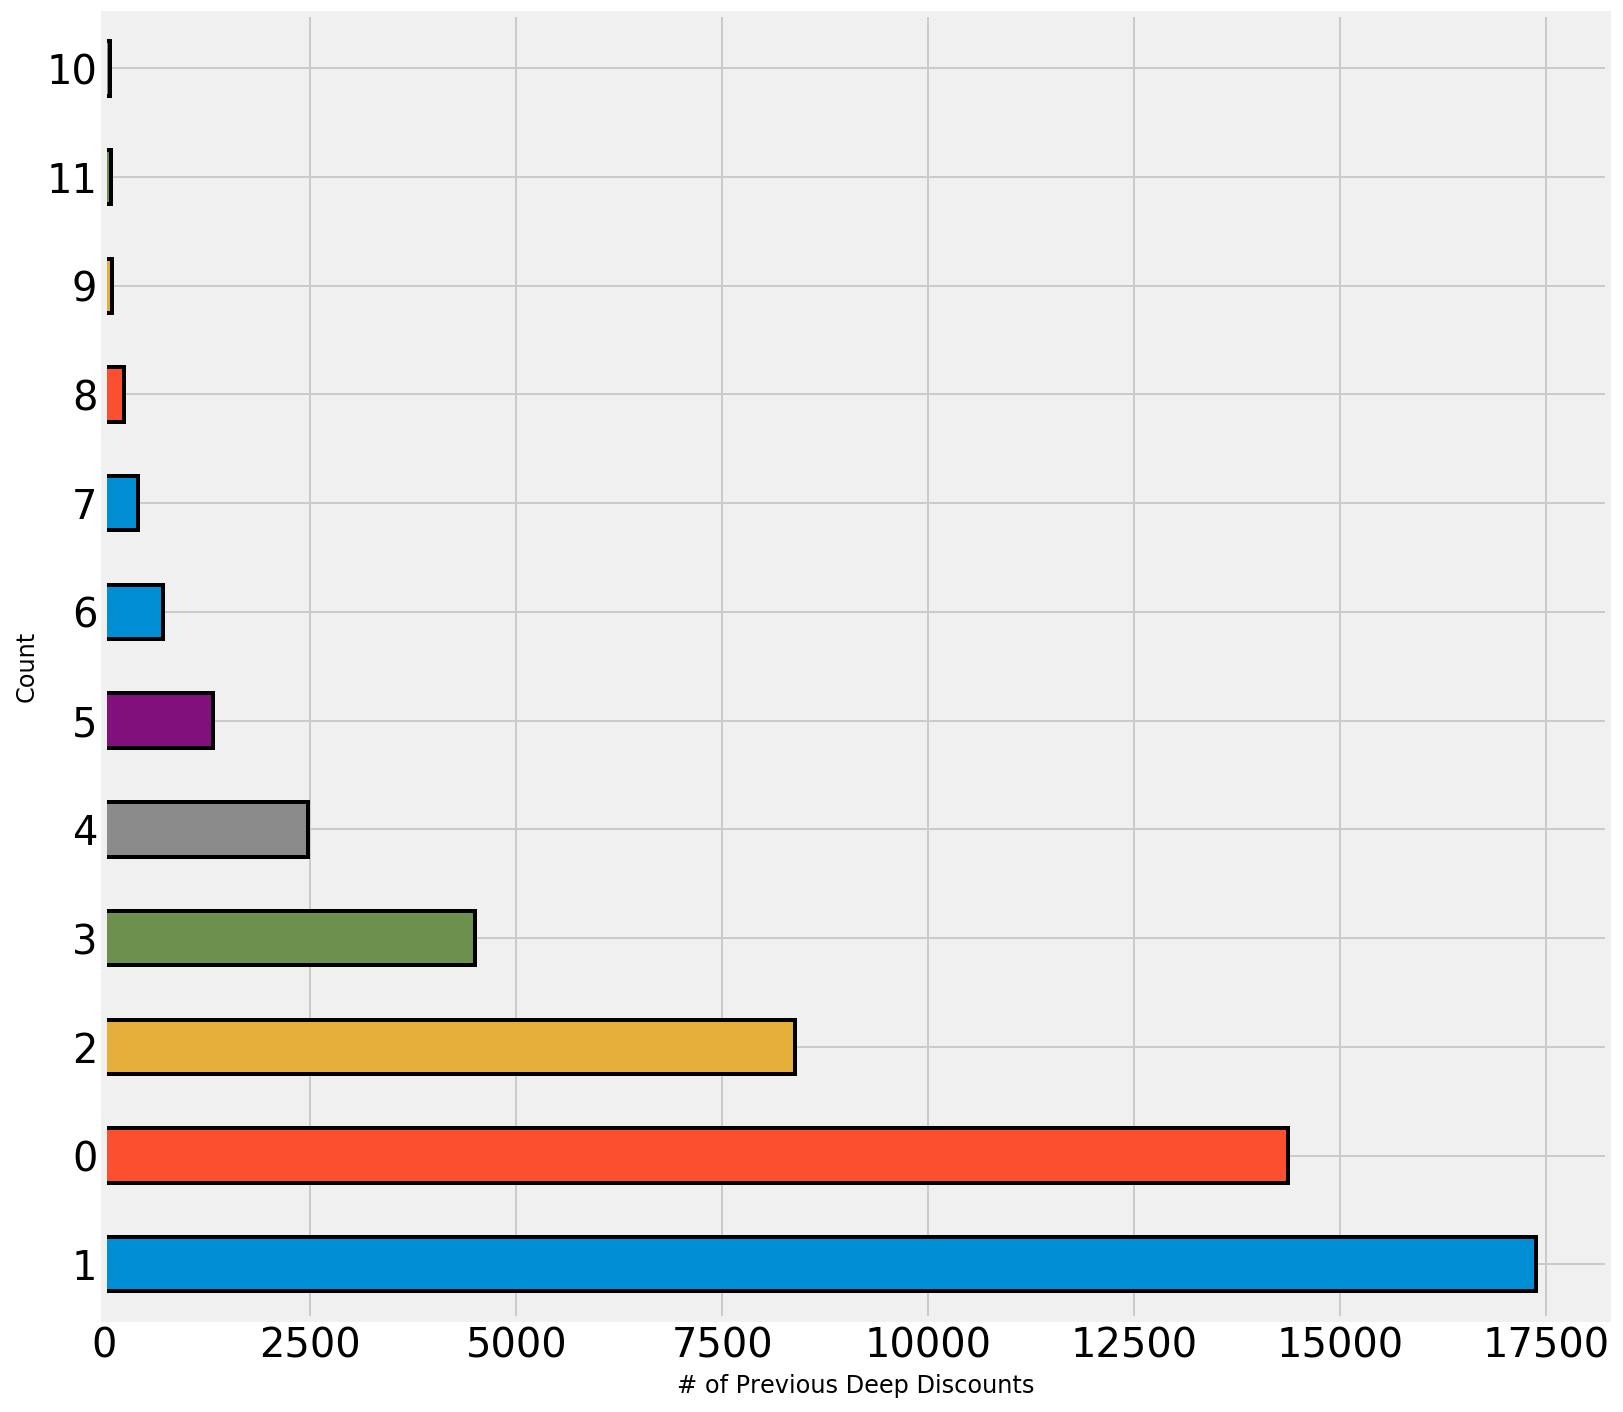

In [5]:
#convert.EverStreamed.value_counts().plot(kind='barh');
convert.PrevDD.value_counts().plot(kind='barh', figsize=(12,12), linewidth=2, edgecolor='black',fontsize=20);
plt.xlabel("# of Previous Deep Discounts")
plt.ylabel("Count");
plt.rcParams["axes.labelsize"] = 20

In [6]:
convert.CC.value_counts()

1    37553
0    12447
Name: CC, dtype: int64

In [7]:
convert.Wave_Activation.value_counts()

0    45703
1     4297
Name: Wave_Activation, dtype: int64

In [8]:
45703+4297

50000

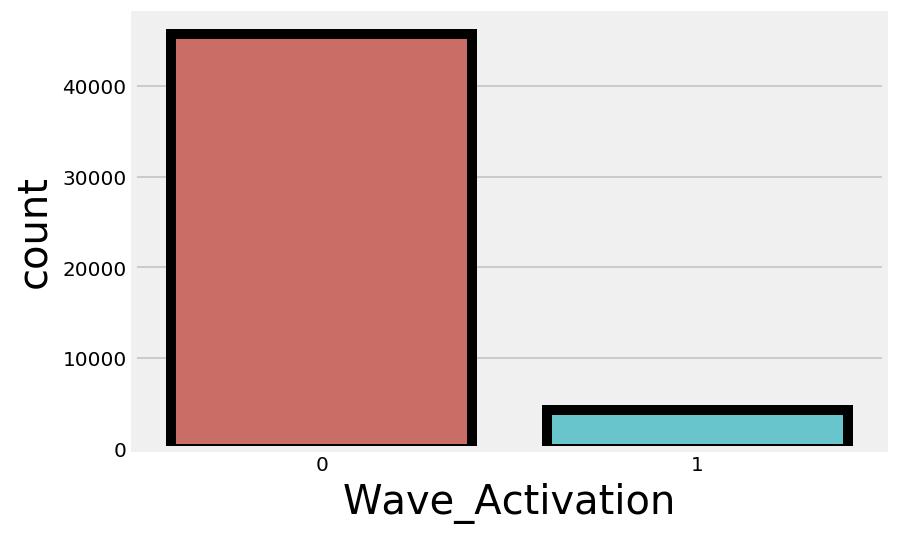

In [9]:
sns.countplot(x='Wave_Activation',data=convert, palette='hls', linewidth=5,edgecolor='black');


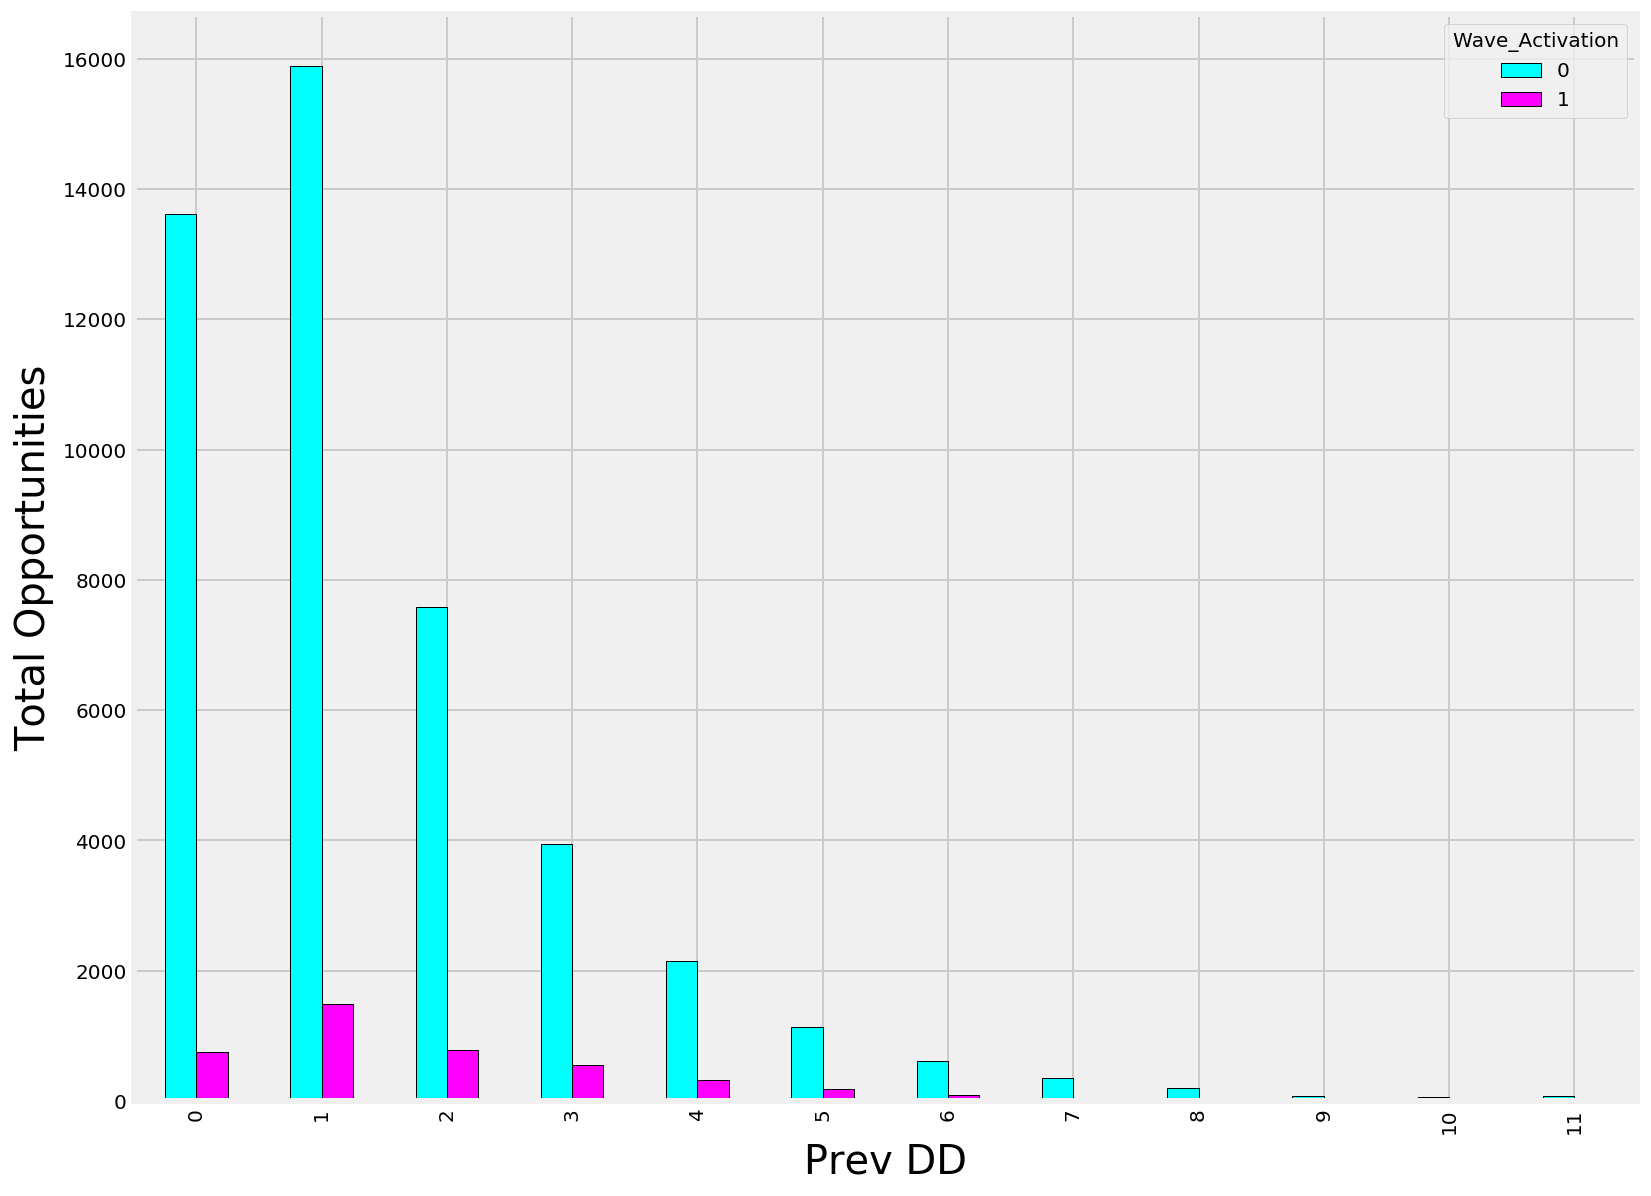

In [10]:
pd.crosstab(convert.PrevDD,convert.Wave_Activation).plot(kind='bar',figsize=(12,10), colormap='cool', edgecolor='black')
plt.xlabel('Prev DD')
plt.ylabel('Total Opportunities');

In [11]:
#HOW DO I CALCULATE THE REACT RATE FOR EACH PREVDD CATEGORY????

In [30]:
convert.groupby('Wave_Activation').StreamingHrs.describe().unstack()

       Wave_Activation
count  0                  45703.000000
       1                   4297.000000
mean   0                      0.248781
       1                      2.840002
std    0                      7.328165
       1                     32.031284
min    0                      0.000000
       1                      0.000000
25%    0                      0.000000
       1                      0.000000
50%    0                      0.000000
       1                      0.000000
75%    0                      0.000000
       1                      0.000000
max    0                    638.940000
       1                   1113.200000
dtype: float64

In [26]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
Record               50000 non-null int64
OEM                  50000 non-null int64
CC                   50000 non-null int64
ListenerPrefs        50000 non-null int64
StreamingHrs         50000 non-null float64
EverStreamed         50000 non-null int64
PrevDD               50000 non-null int64
IncomeOver75k        50000 non-null int64
DeactFinancial       50000 non-null int64
DeactNotListening    50000 non-null int64
DeactValue           50000 non-null int64
DiscountAtDeact      50000 non-null int64
Tenure               50000 non-null int64
Wave_Activation      50000 non-null int64
Wave_Activation2     50000 non-null object
dtypes: float64(1), int64(13), object(1)
memory usage: 5.7+ MB


In [13]:
count_no_sub = len(convert[convert['Wave_Activation']==0])
count_sub = len(convert[convert['Wave_Activation']==1])

pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of subscription 8.594


In [14]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
Record               50000 non-null int64
OEM                  50000 non-null int64
CC                   50000 non-null int64
ListenerPrefs        50000 non-null int64
StreamingHrs         50000 non-null float64
EverStreamed         50000 non-null int64
PrevDD               50000 non-null int64
IncomeOver75k        50000 non-null int64
DeactFinancial       50000 non-null int64
DeactNotListening    50000 non-null int64
DeactValue           50000 non-null int64
DiscountAtDeact      50000 non-null int64
Tenure               50000 non-null int64
Wave_Activation      50000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


In [15]:
numerics = convert[["PrevDD", "Tenure"]]
numerics.describe()

,PrevDD,Tenure
count,50000.000000,50000.000000
mean,1.507480,1011.925060
std,1.634025,705.078317
min,0.000000,-207.000000
25%,0.000000,434.000000
50%,1.000000,900.000000
75%,2.000000,1513.000000
max,11.000000,4630.000000


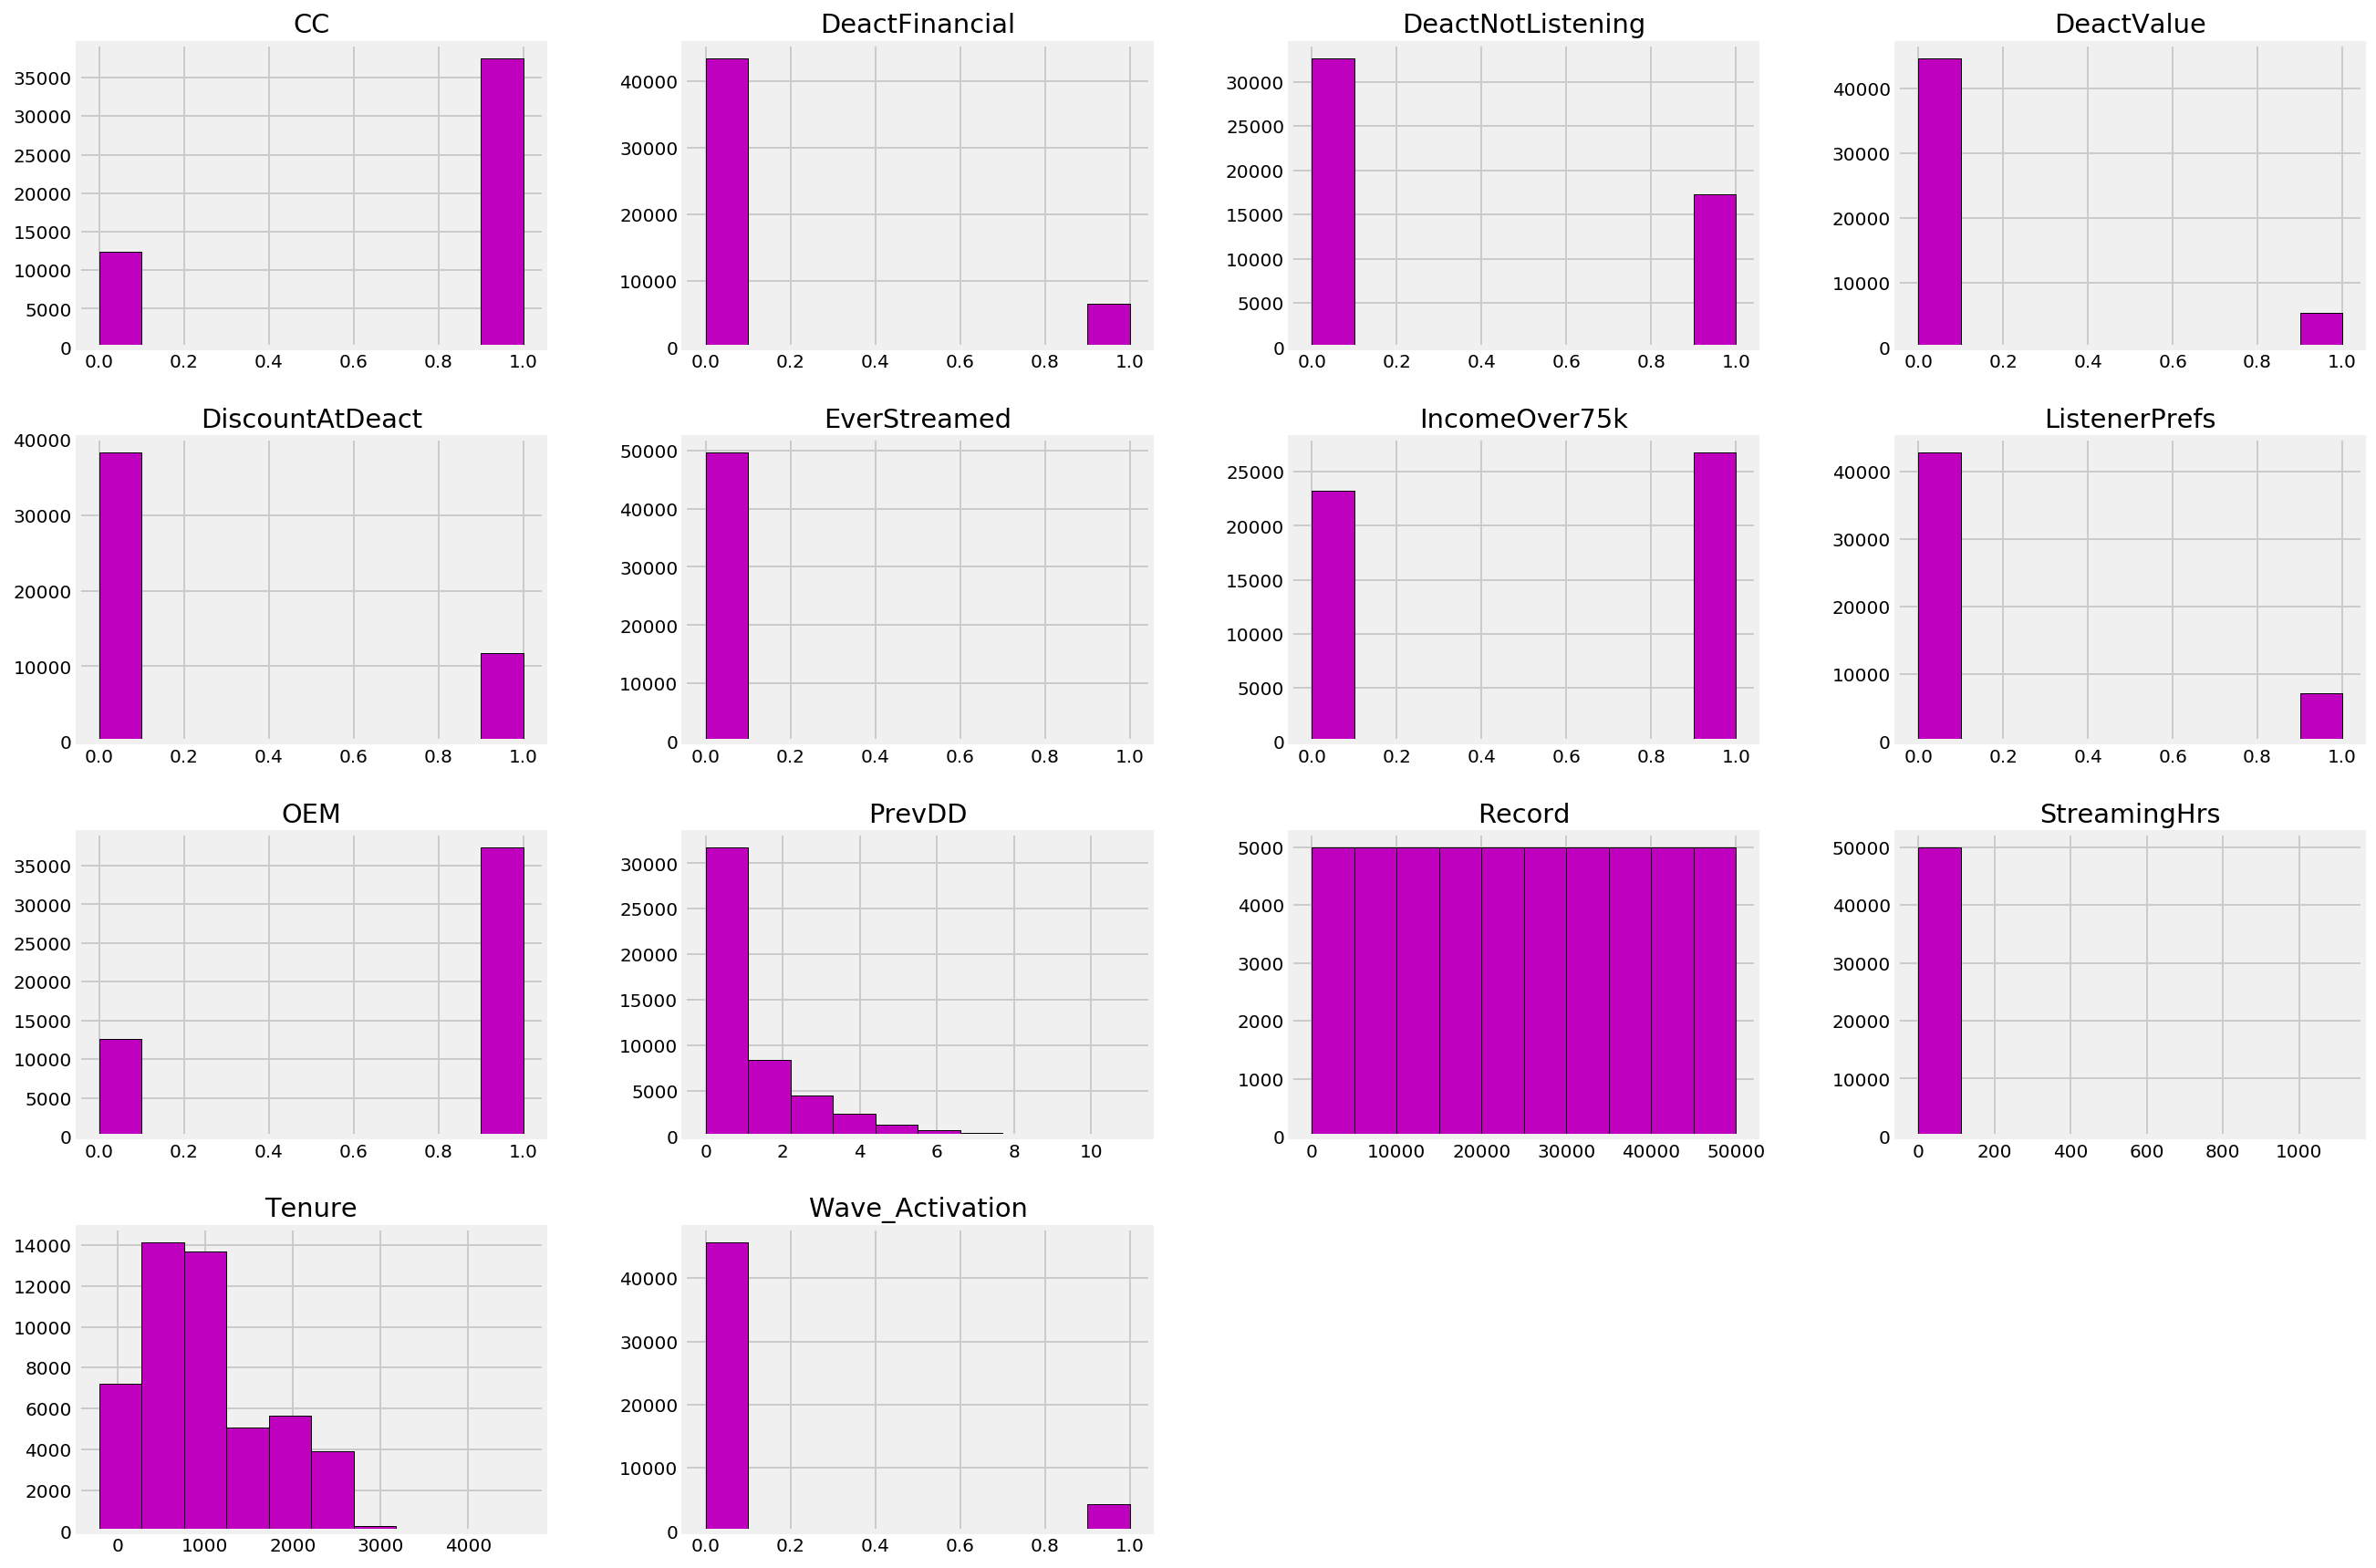

In [16]:
convert.hist(figsize=(20,15), edgecolor='black', color='m');

In [17]:
convert.EverStreamed.value_counts()

0    49581
1      419
Name: EverStreamed, dtype: int64

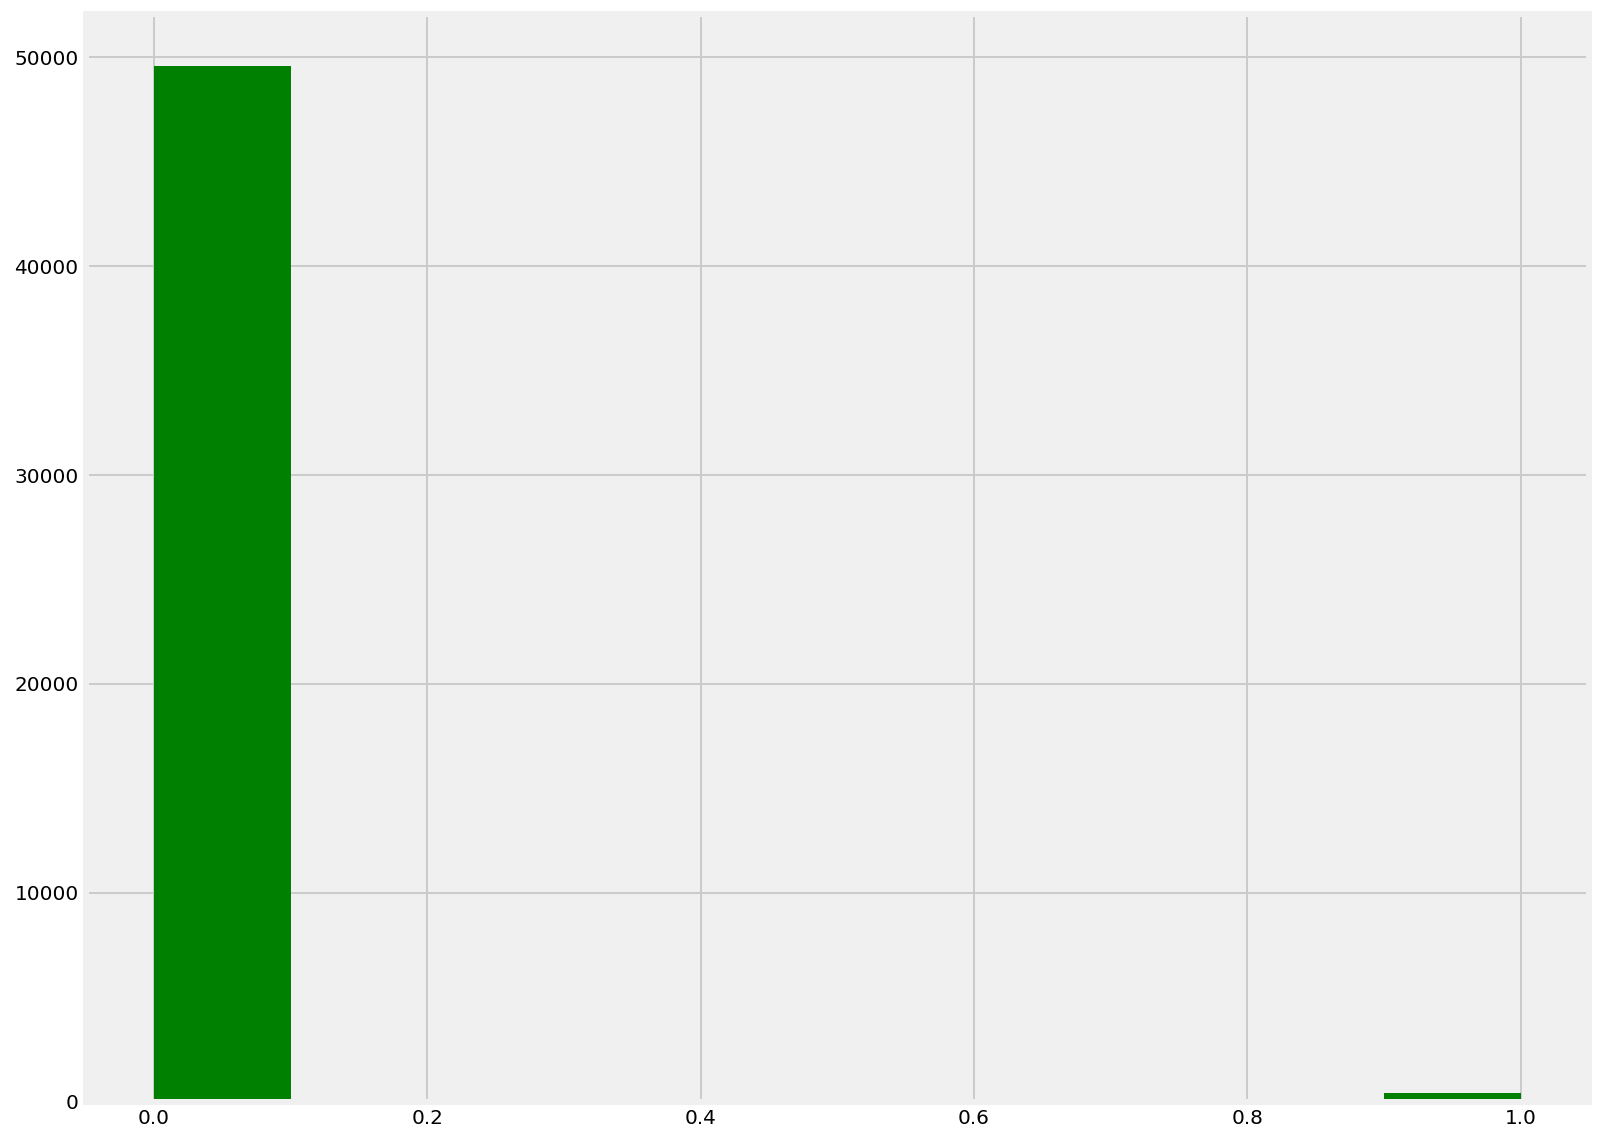

In [18]:
convert.EverStreamed.hist(figsize=(12,10), color='g');

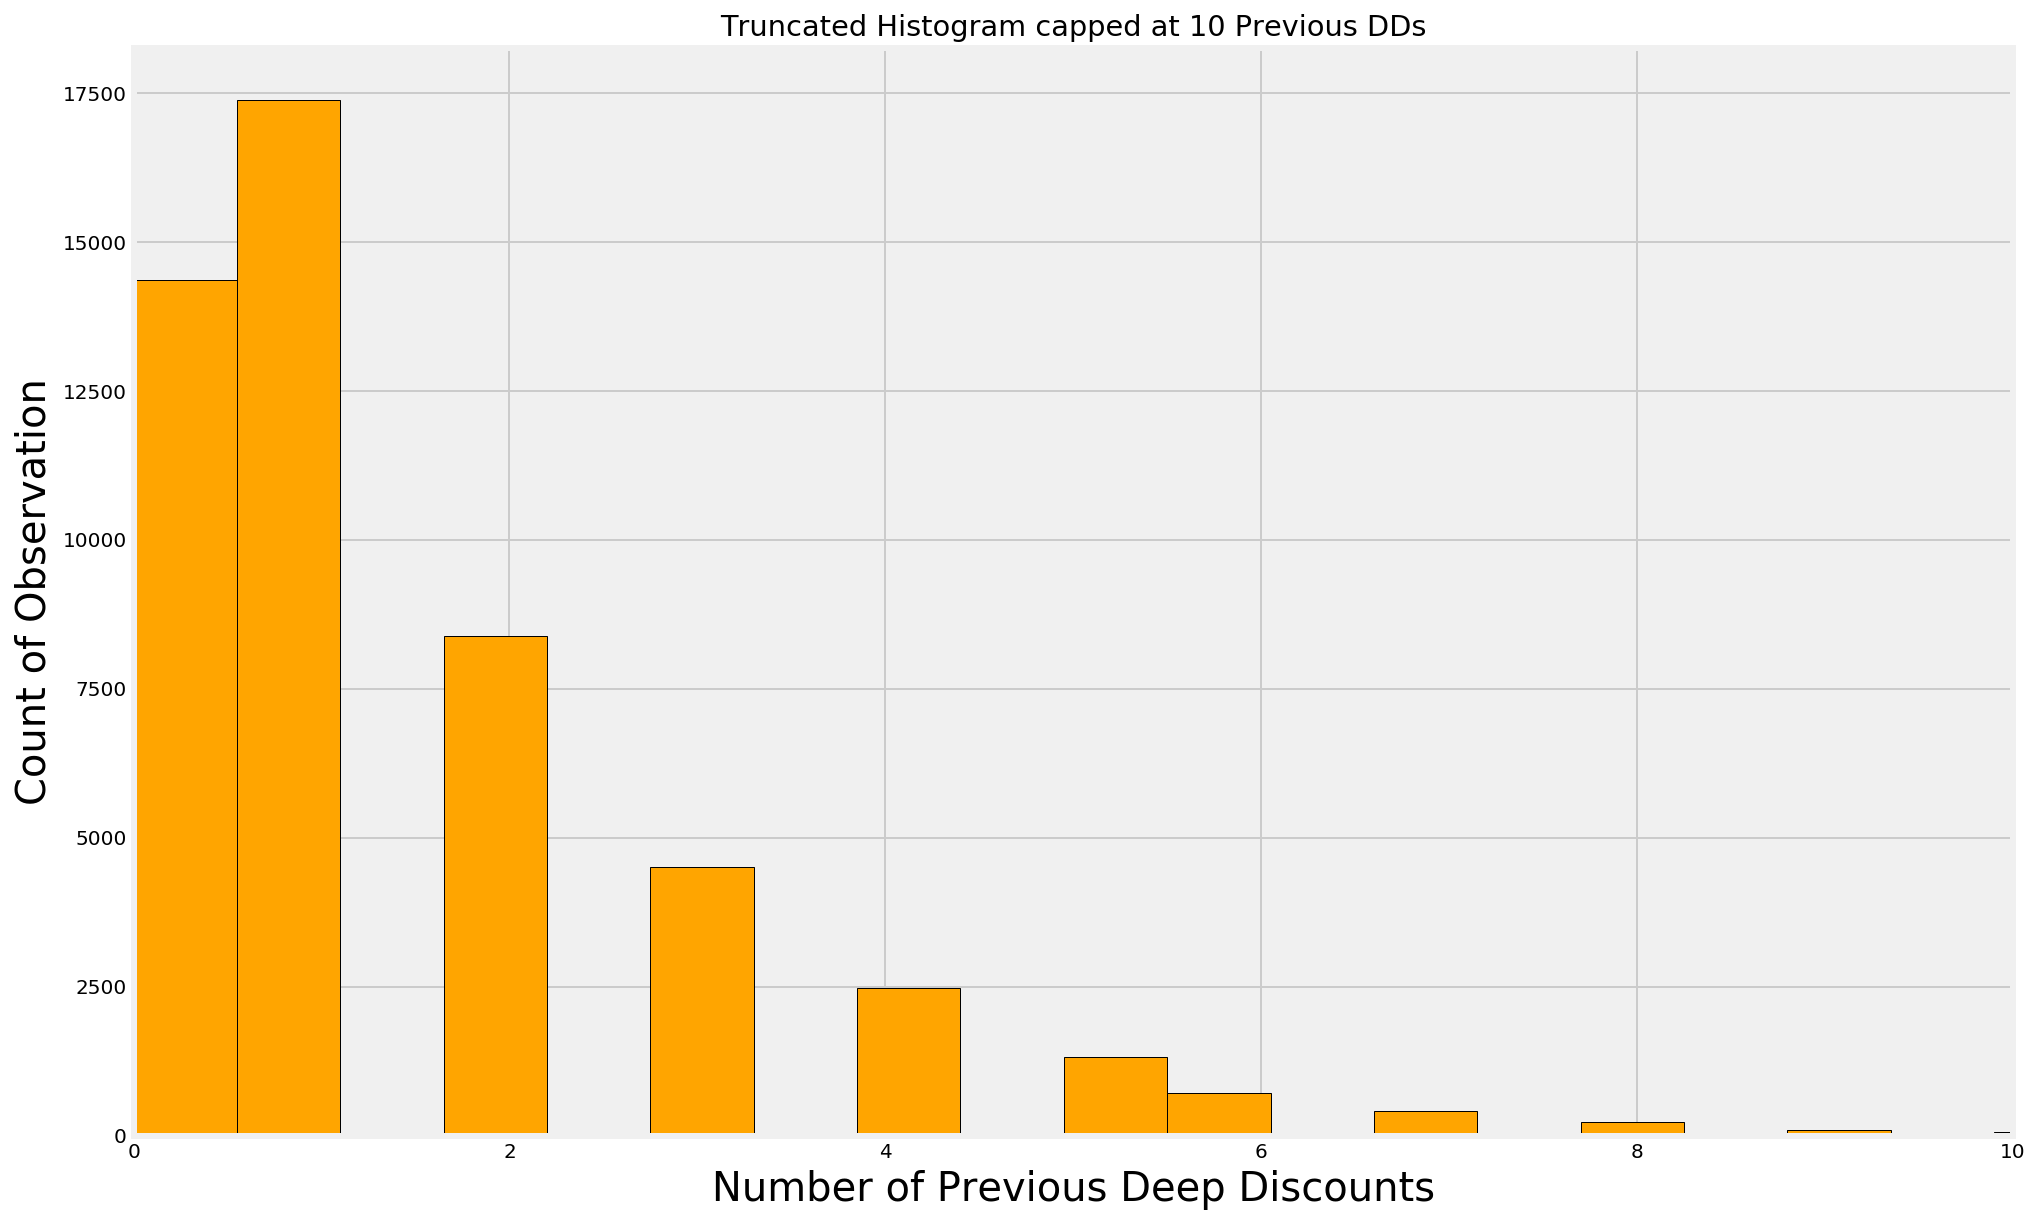

In [19]:
convert['PrevDD'].hist(bins=20, figsize=(15,10), edgecolor='black', facecolor='orange')
plt.xlim(0,10)
plt.xlabel('Number of Previous Deep Discounts')
plt.ylabel('Count of Observation')
plt.title('Truncated Histogram capped at 10 Previous DDs');

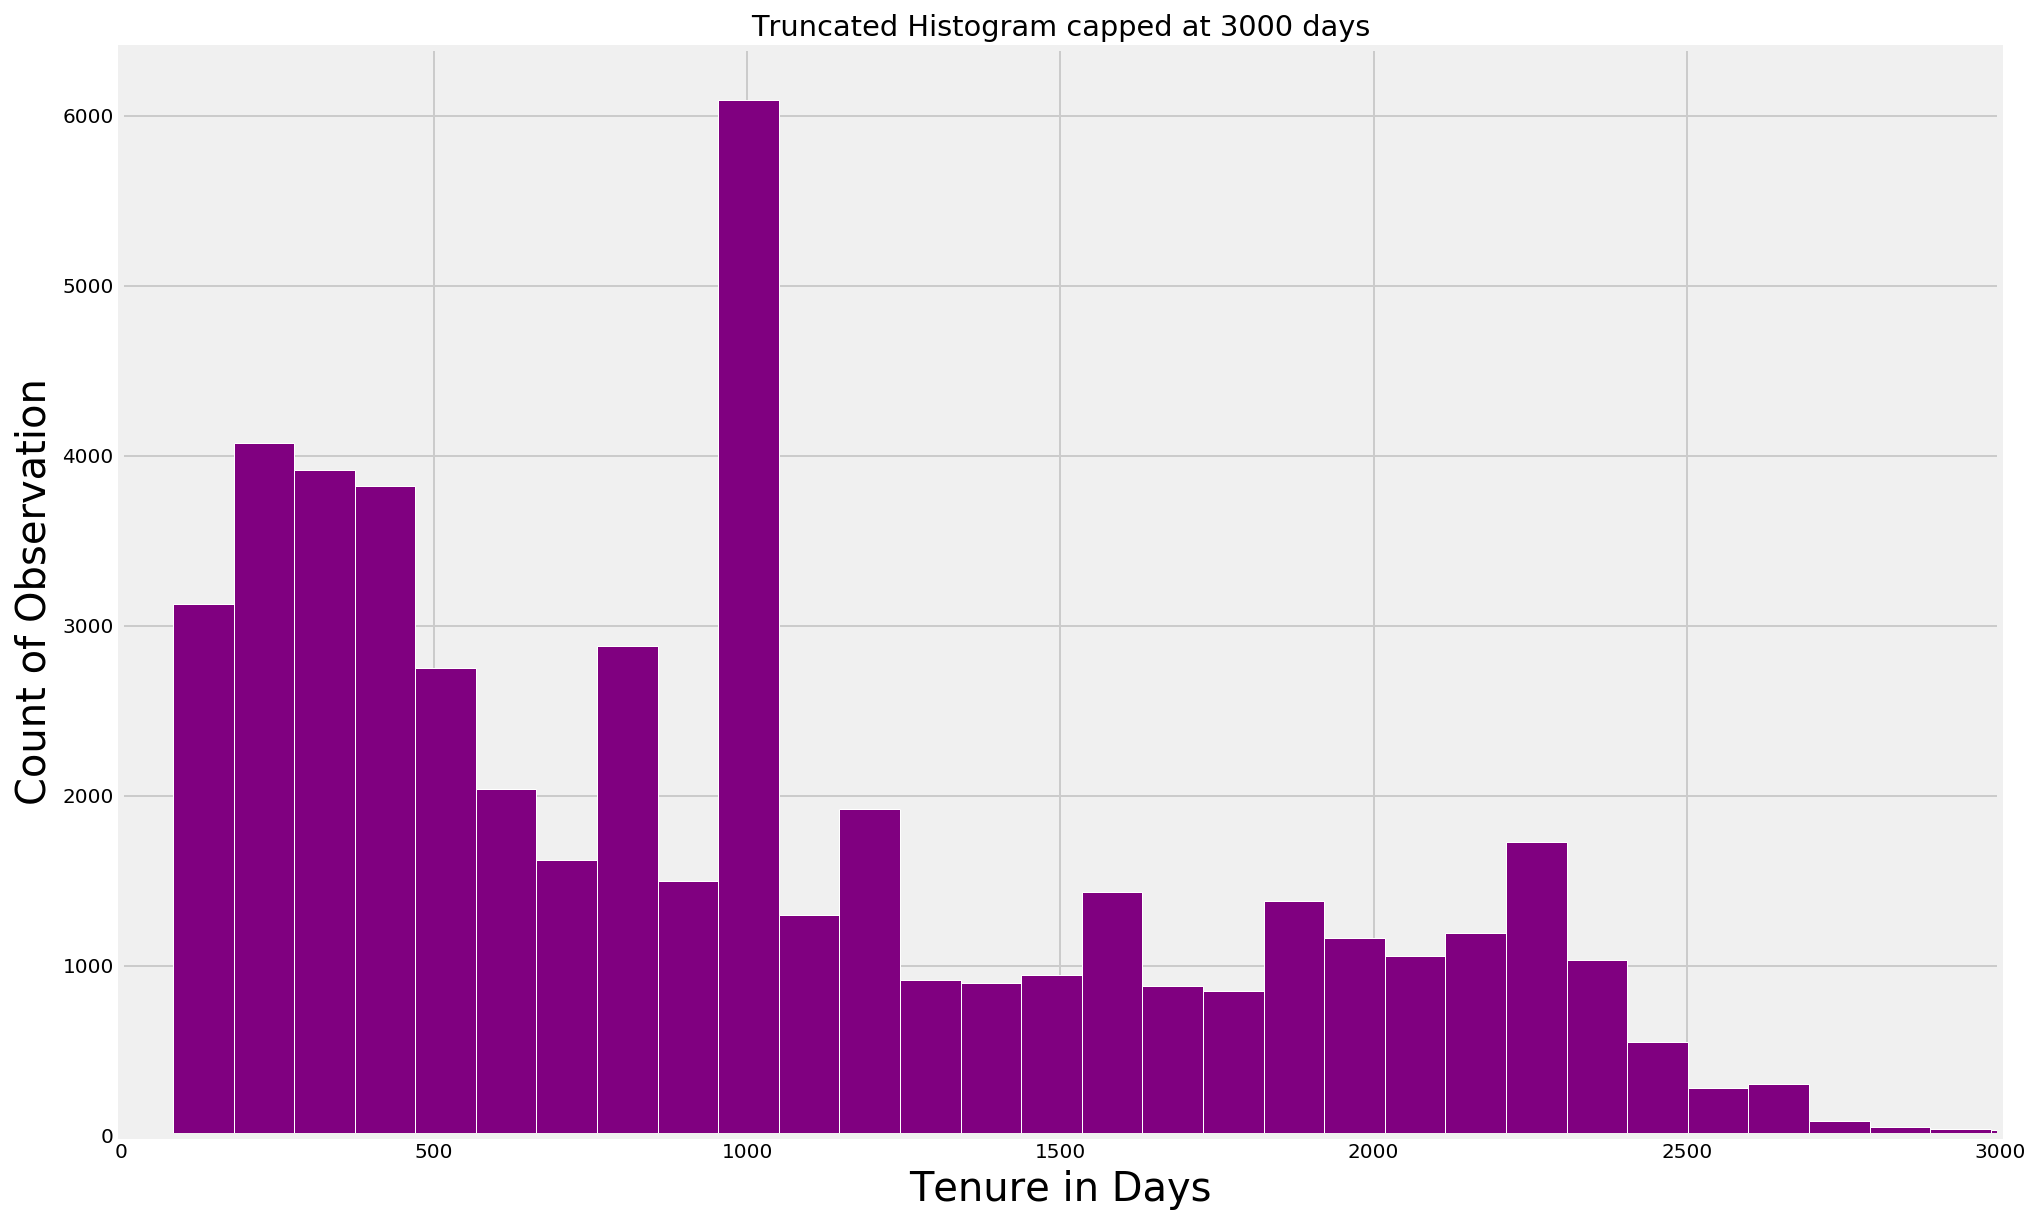

In [20]:
convert['Tenure'].hist(bins=50, figsize=(15,10), edgecolor='white', facecolor='purple')
plt.xlim(0,3000)
plt.xlabel('Tenure in Days')
plt.ylabel('Count of Observation')
plt.title('Truncated Histogram capped at 3000 days');

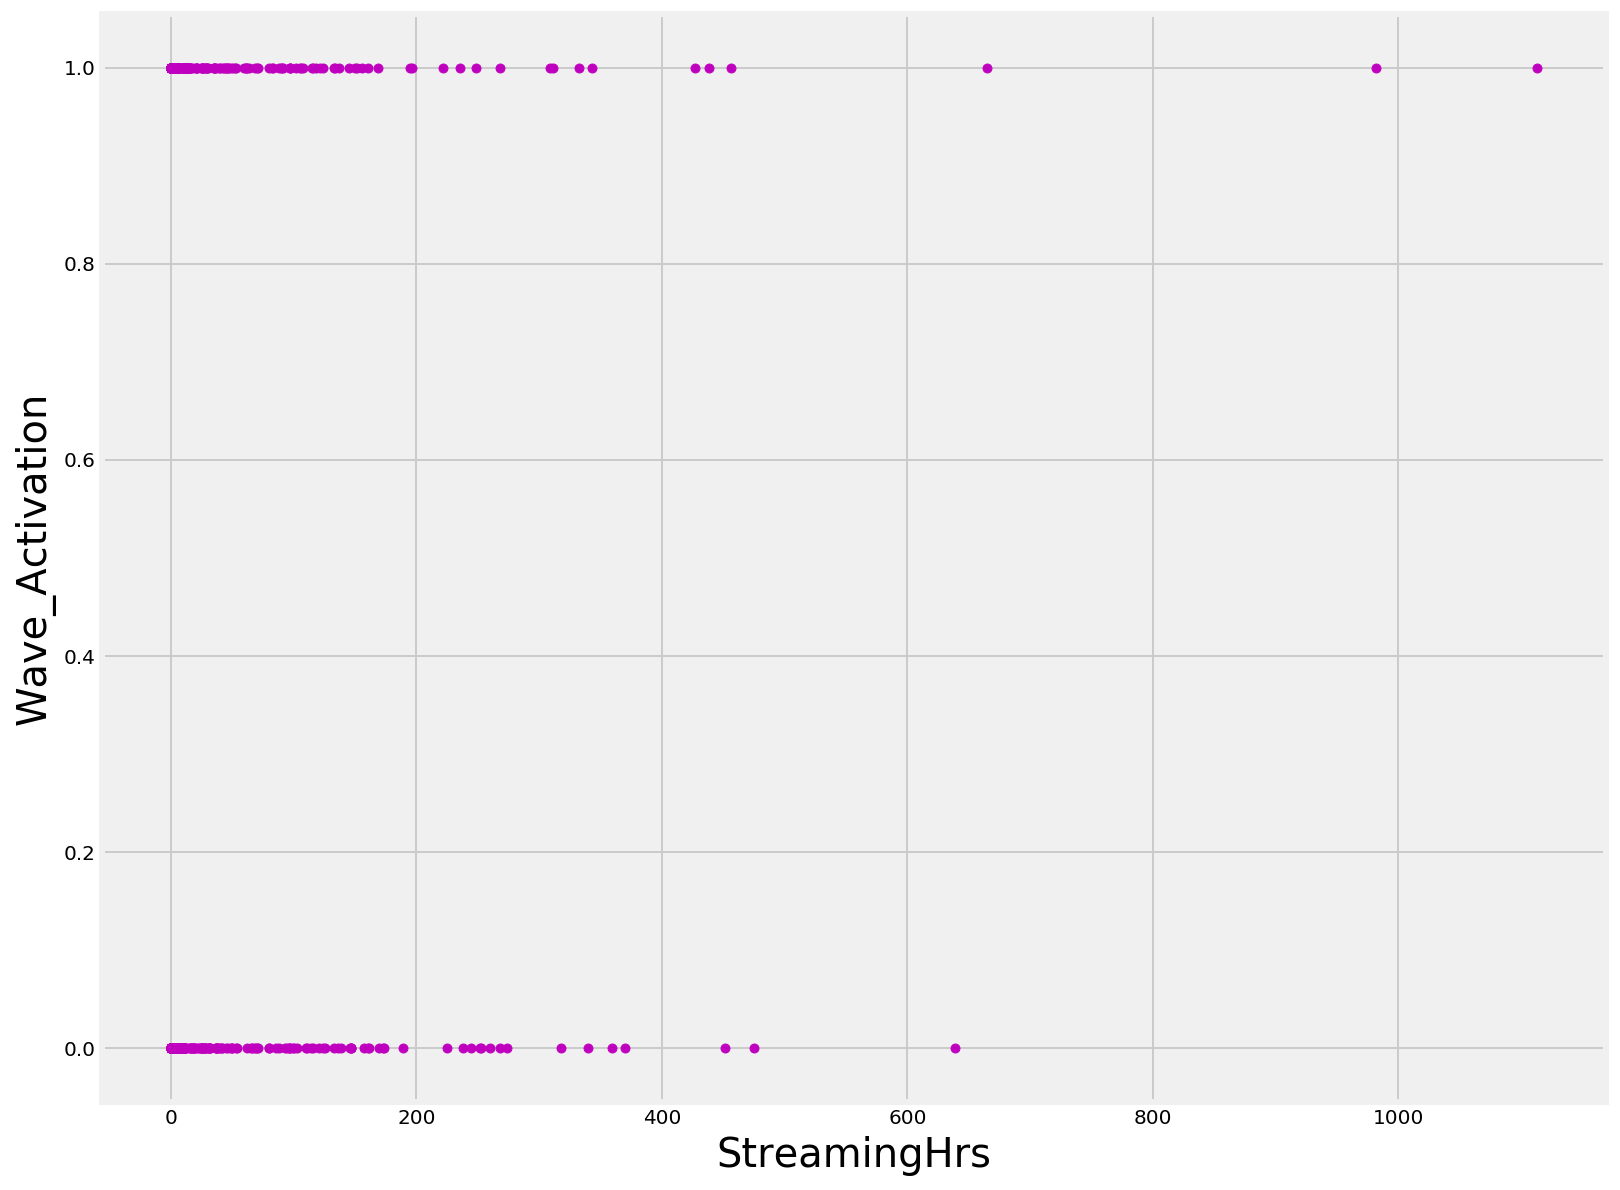

In [21]:
convert.plot.scatter(x='StreamingHrs', y='Wave_Activation', color='m', figsize = (12,10));


In [22]:
convert['Wave_Activation'].value_counts()

0    45703
1     4297
Name: Wave_Activation, dtype: int64

In [23]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
Record               50000 non-null int64
OEM                  50000 non-null int64
CC                   50000 non-null int64
ListenerPrefs        50000 non-null int64
StreamingHrs         50000 non-null float64
EverStreamed         50000 non-null int64
PrevDD               50000 non-null int64
IncomeOver75k        50000 non-null int64
DeactFinancial       50000 non-null int64
DeactNotListening    50000 non-null int64
DeactValue           50000 non-null int64
DiscountAtDeact      50000 non-null int64
Tenure               50000 non-null int64
Wave_Activation      50000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


In [24]:
convert.shape

(50000, 14)

In [25]:
convert.head()

,Record,OEM,CC,ListenerPrefs,StreamingHrs,EverStreamed,PrevDD,IncomeOver75k,DeactFinancial,DeactNotListening,DeactValue,DiscountAtDeact,Tenure,Wave_Activation
0,1,1,1,1,0.0,0,1,0,1,0,0,0,1000,0
1,2,1,0,0,0.0,0,1,1,0,0,0,1,136,0
2,3,1,1,0,0.0,0,0,1,0,1,0,0,882,0
3,4,1,1,0,0.0,0,2,0,0,0,1,1,433,0
4,5,1,1,0,0.0,0,1,1,1,0,0,0,1525,0


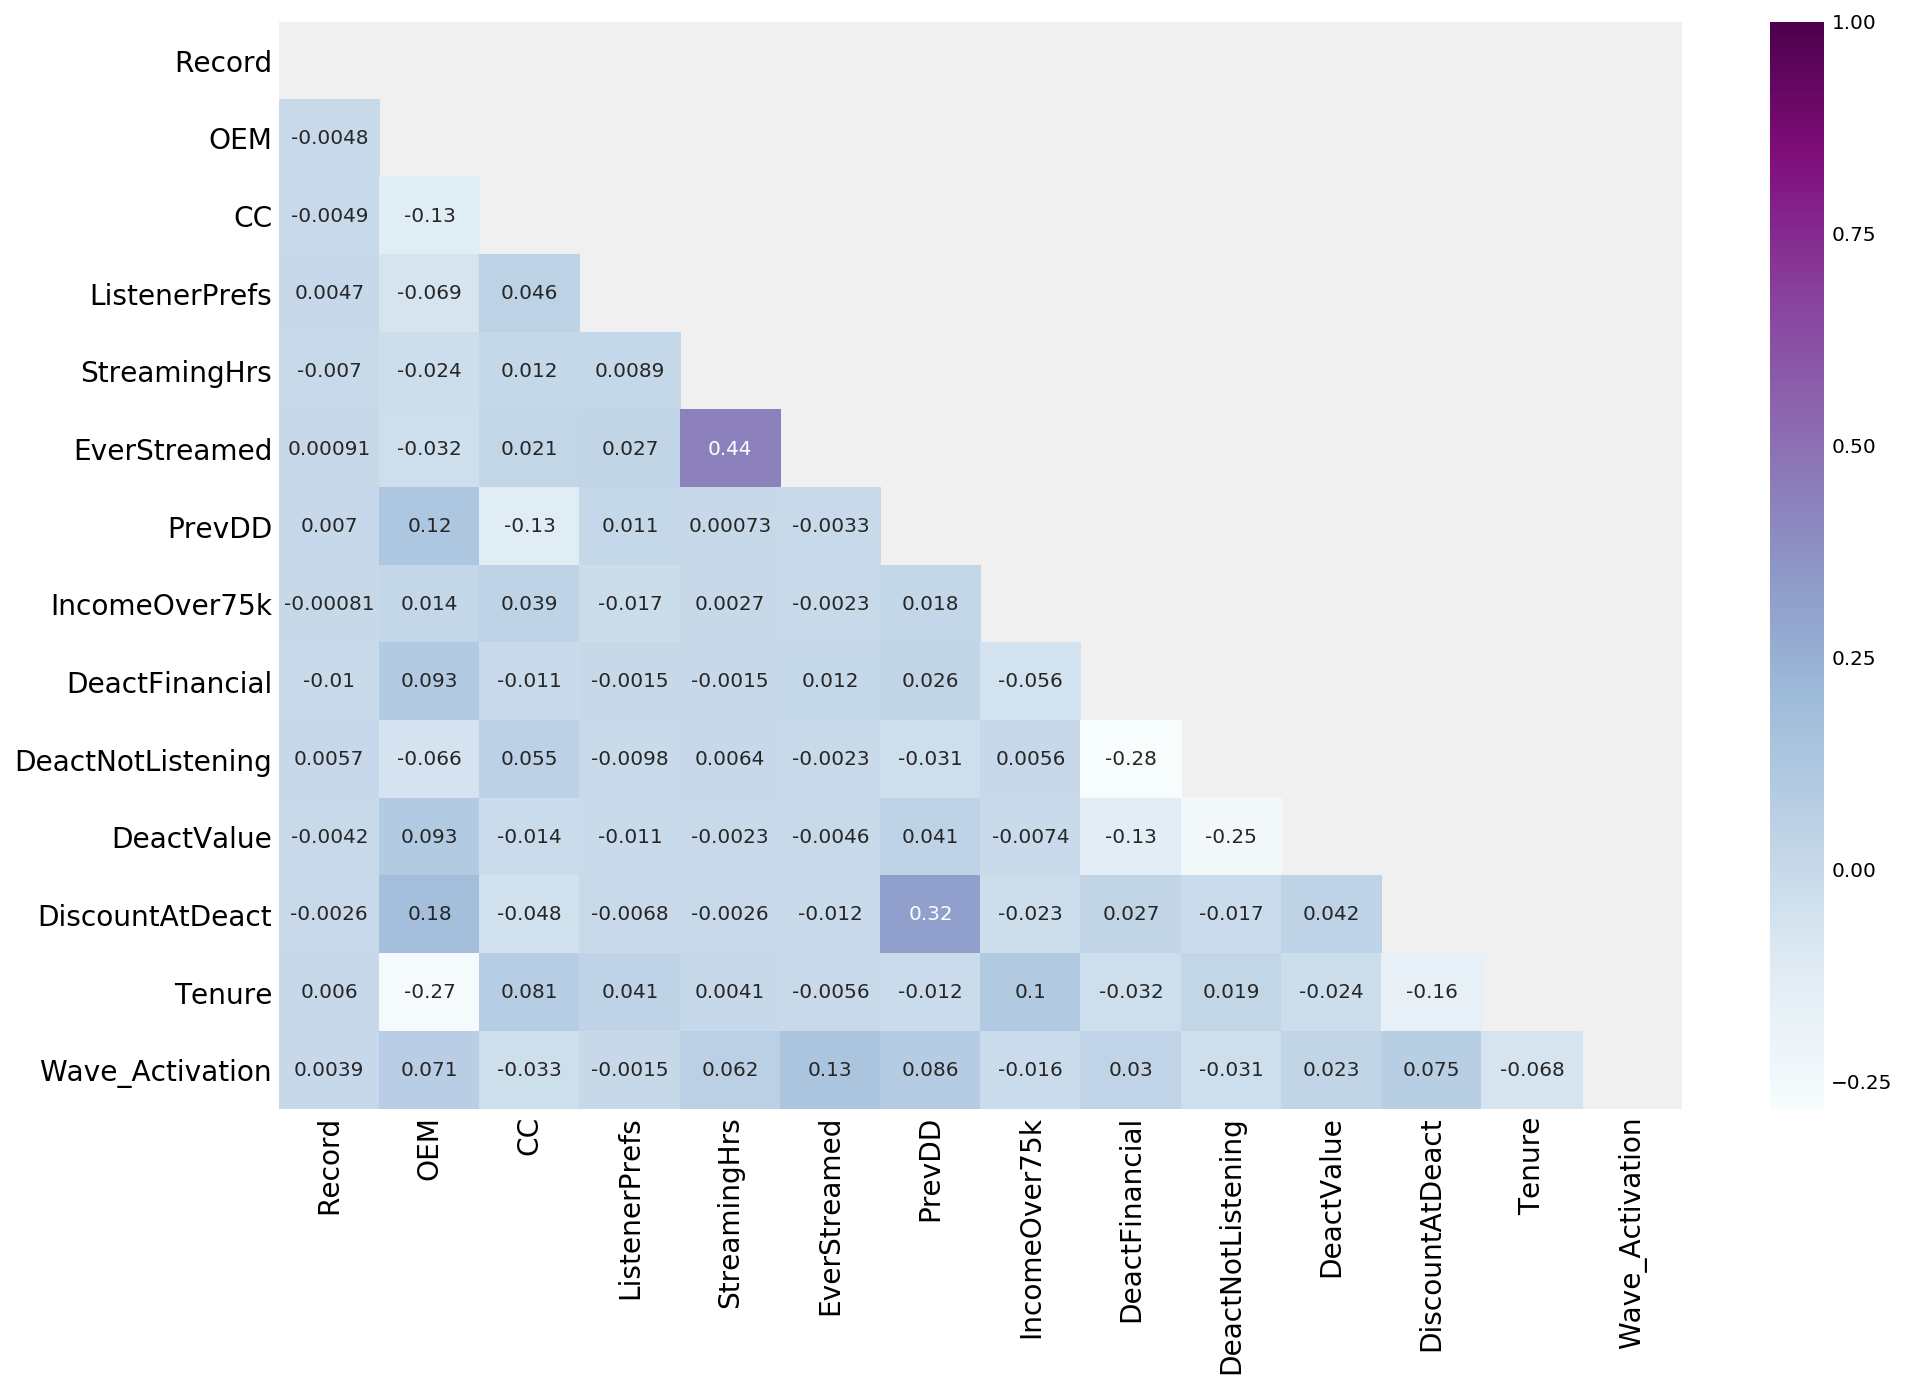

In [26]:
corr = convert.corr()

fig, ax = plt.subplots(figsize=(14,10))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, cmap="BuPu", annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [27]:
convert.StreamingHrs.describe()

count    50000.000000
mean         0.471471
std         11.737554
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1113.200000
Name: StreamingHrs, dtype: float64

In [28]:
#X & y are now arrays
X = convert.iloc[:,1:13].values
y = convert.iloc[:,13].values

In [29]:
419/50000*100

0.8380000000000001

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=0)

In [31]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)
coef = classifier.coef_[0]
intercept = classifier.intercept_
print (coef)
print (intercept)

[ 0.18417655 -0.03631844  0.00081623  0.01013478  0.21658428  0.21424123
 -0.05819809  0.06368847 -0.0792505   0.02483686  0.13648977 -0.25155652]
[-2.48474649]


In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[22837,    30],
       [ 2090,    43]])

In [37]:
classifier.predict_proba(X_test)

array([[0.97510736, 0.02489264],
       [0.77474744, 0.22525256],
       [0.91494565, 0.08505435],
       ...,
       [0.91648346, 0.08351654],
       [0.9581703 , 0.0418297 ],
       [0.89484781, 0.10515219]])

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     22867
          1       0.59      0.02      0.04      2133

avg / total       0.89      0.92      0.88     25000



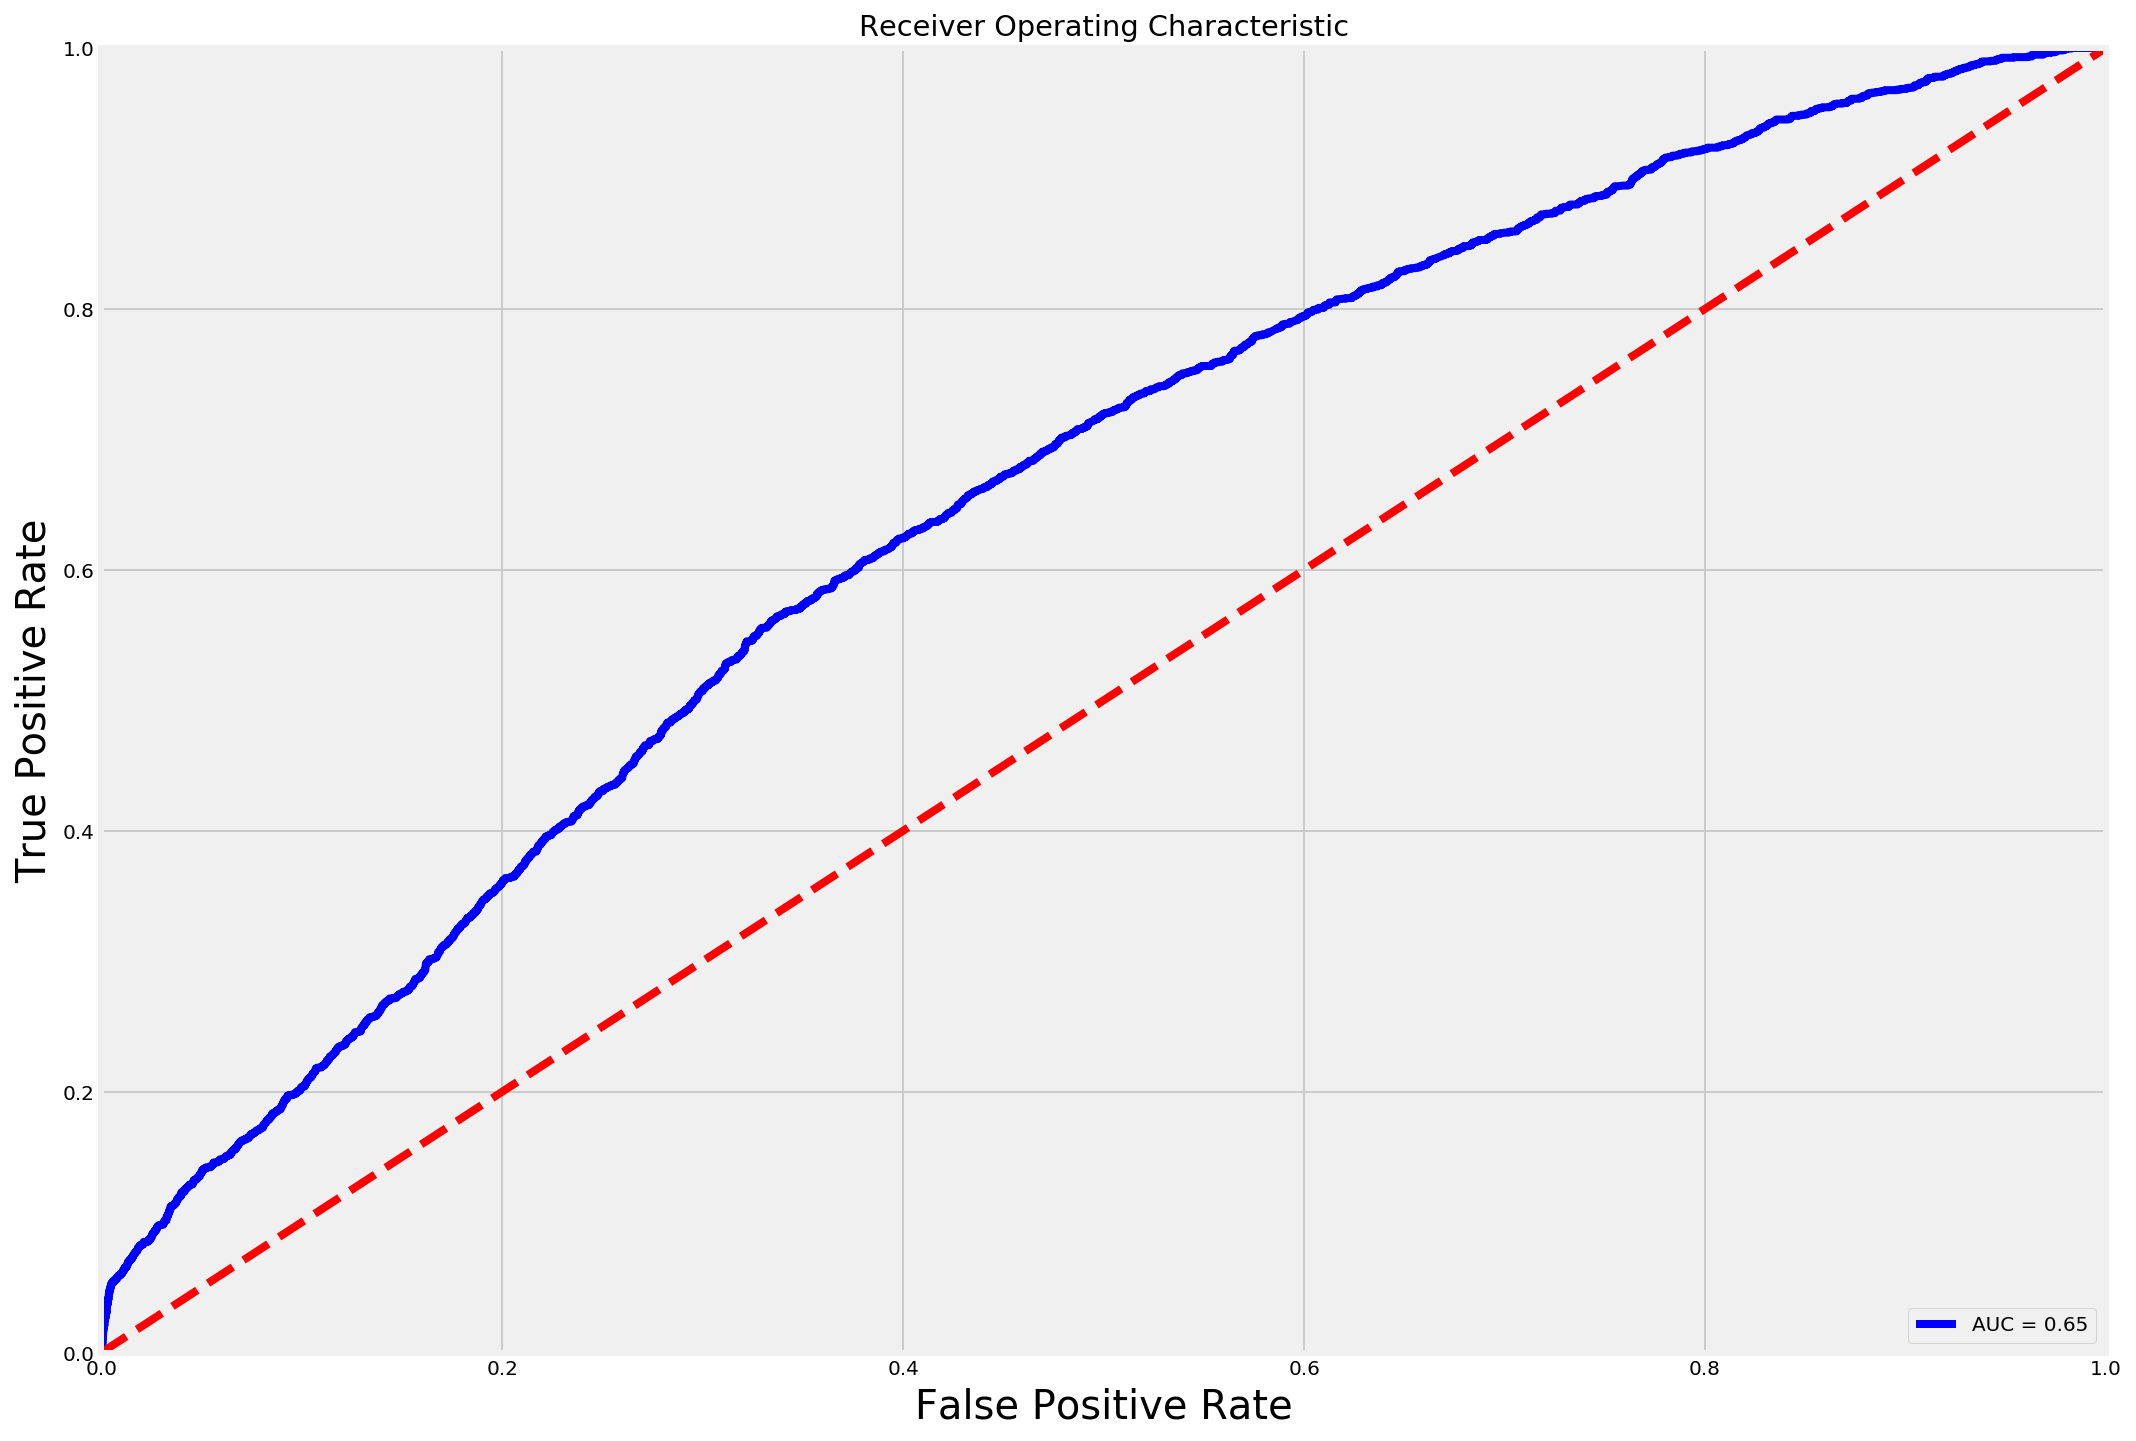

In [39]:
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics


probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

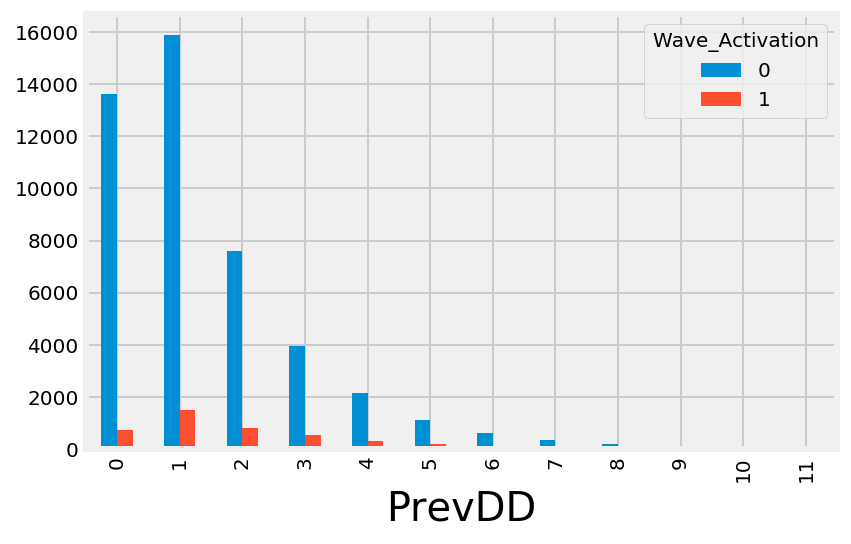

In [40]:
%matplotlib inline
pd.crosstab(convert.PrevDD, convert.Wave_Activation).plot(kind='bar');
#how do I wrap a loop around this to cycle through all the features?

In [41]:
X.shape

(50000, 12)

In [42]:
#FEATURE SELECTION/OPTIMIZATION (RFE = Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 6 attributes
rfe = RFE(model, 6)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True False False  True False  True  True False]
[1 1 5 6 1 4 3 1 2 1 1 7]


1 OEM                  50000 non-null int64
2 CC                   50000 non-null int64
3 ListenerPrefs        50000 non-null int64
4 StreamingHrs         50000 non-null float64
5 EverStreamed         50000 non-null int64
6 PrevDD               50000 non-null int64
7 IncomeOver75k        50000 non-null int64
8 DeactFinancial       50000 non-null int64
9 DeactNotListening    50000 non-null int64
10 DeactValue           50000 non-null int64
11 DiscountAtDeact      50000 non-null int64
12 Tenure               50000 non-null int64

In [43]:
#UNSAMPLED LOGISTIC ON TOP VARIABLES PER RFE
#X & y are now arrays
X_sub = convert.loc[:,["OEM", "CC", "EverStreamed", "DeactFinancial", "DeactValue", "DiscountAtDeact"]].values
y = convert.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sub,y,test_size=0.50,random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)
coef = classifier.coef_[0]
print (coef)
intercept = classifier.intercept_
print (intercept)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

classifier.predict_proba(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[ 0.23764534 -0.07248656  0.22356054  0.0946899   0.04932728  0.22425072]
[-2.4403603]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96     22867
          1       0.57      0.02      0.04      2133

avg / total       0.89      0.92      0.88     25000



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


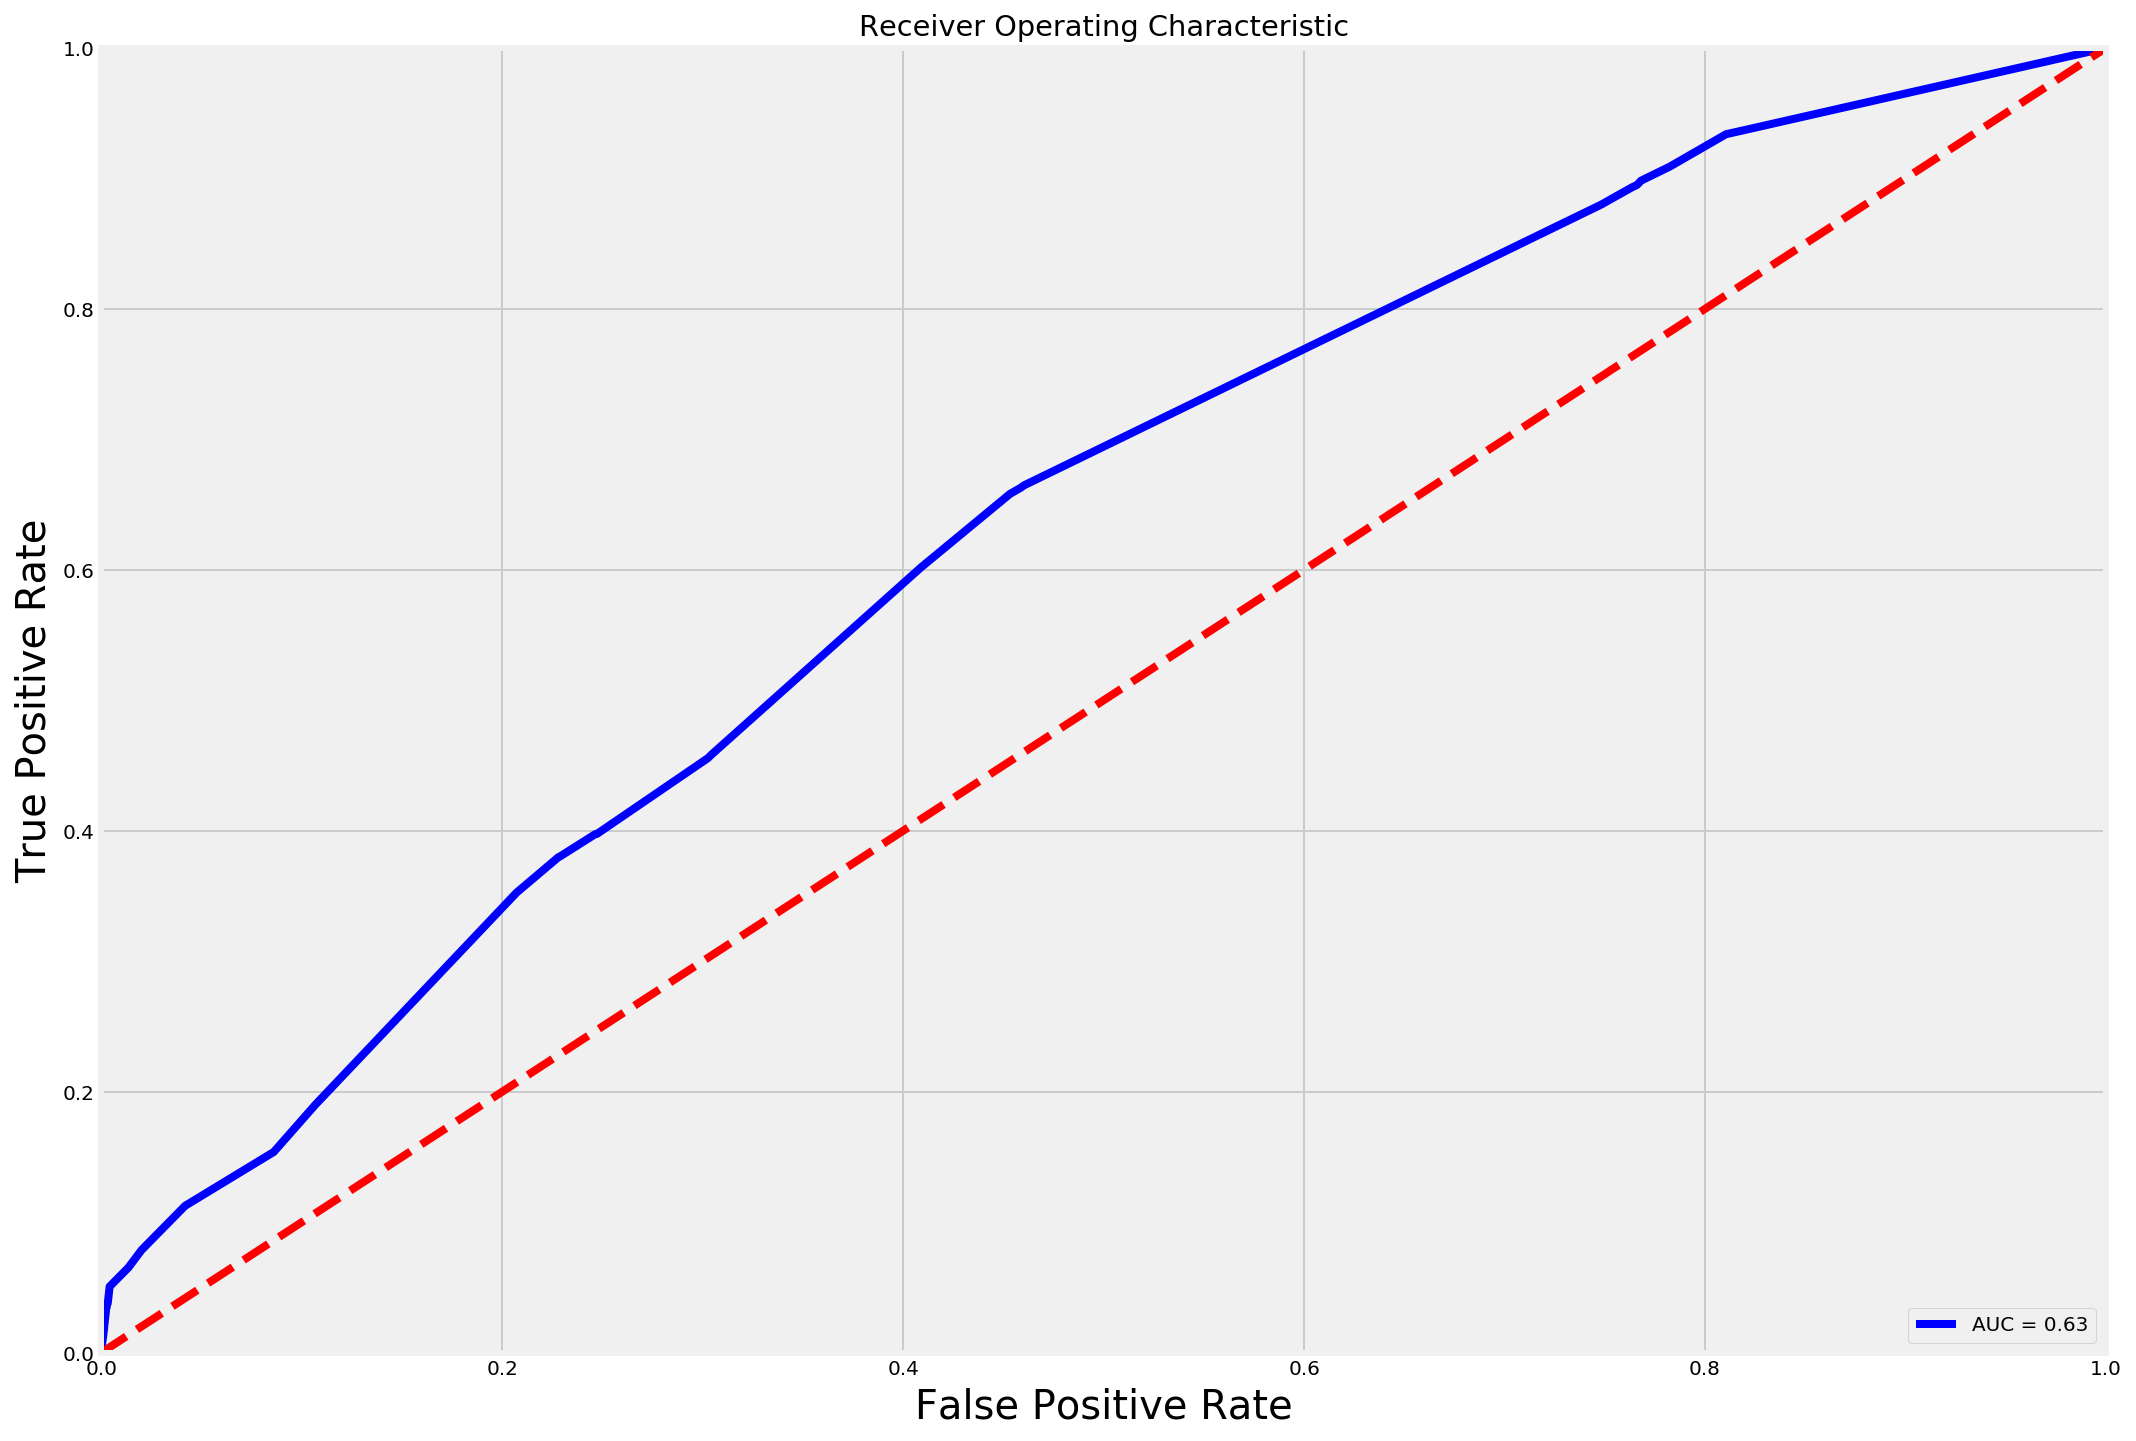

In [44]:
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics


probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*******************************************************

In [45]:
#SAMPLE DOWN NON-RESPONDERS TO GET A BALANCE TARGET VARIABLE & REMOVE IRRELEVANT FEATURES
Conversion = convert.loc[convert['Wave_Activation'] == 1]
Non_conv = convert.loc[convert['Wave_Activation'] == 0]
NC_sampled= Non_conv.sample(n=4300, random_state=12)
convert2 = pd.concat([Conversion,NC_sampled], ignore_index=True)

del convert2['Record'] #remove this column as it's just a record ID, not a feature

In [46]:
convert2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 13 columns):
OEM                  8597 non-null int64
CC                   8597 non-null int64
ListenerPrefs        8597 non-null int64
StreamingHrs         8597 non-null float64
EverStreamed         8597 non-null int64
PrevDD               8597 non-null int64
IncomeOver75k        8597 non-null int64
DeactFinancial       8597 non-null int64
DeactNotListening    8597 non-null int64
DeactValue           8597 non-null int64
DiscountAtDeact      8597 non-null int64
Tenure               8597 non-null int64
Wave_Activation      8597 non-null int64
dtypes: float64(1), int64(12)
memory usage: 873.2 KB


In [47]:
convert2['Wave_Activation'].value_counts()

0    4300
1    4297
Name: Wave_Activation, dtype: int64

In [59]:
4300+4297

8597

In [54]:
# EVENLY SAMPLED LOGISTIC WITH BEST FEATURES ACCORDING TO RFE
#X & y are now arrays
X_sub = convert2.loc[:,["OEM", "CC", "EverStreamed", "DeactFinancial", "DeactValue", "DiscountAtDeact"]].values
y = convert2.iloc[:,12].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sub,y,test_size=0.50,random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train,y_train)
coef = classifier.coef_[0]
print (coef)
intercept = classifier.intercept_
print (intercept)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

classifier.predict_proba(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[ 0.24067527 -0.11784716  0.3698351   0.13206167  0.05272827  0.27275273]
[0.00904058]
             precision    recall  f1-score   support

          0       0.59      0.58      0.59      2147
          1       0.59      0.59      0.59      2152

avg / total       0.59      0.59      0.59      4299



/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


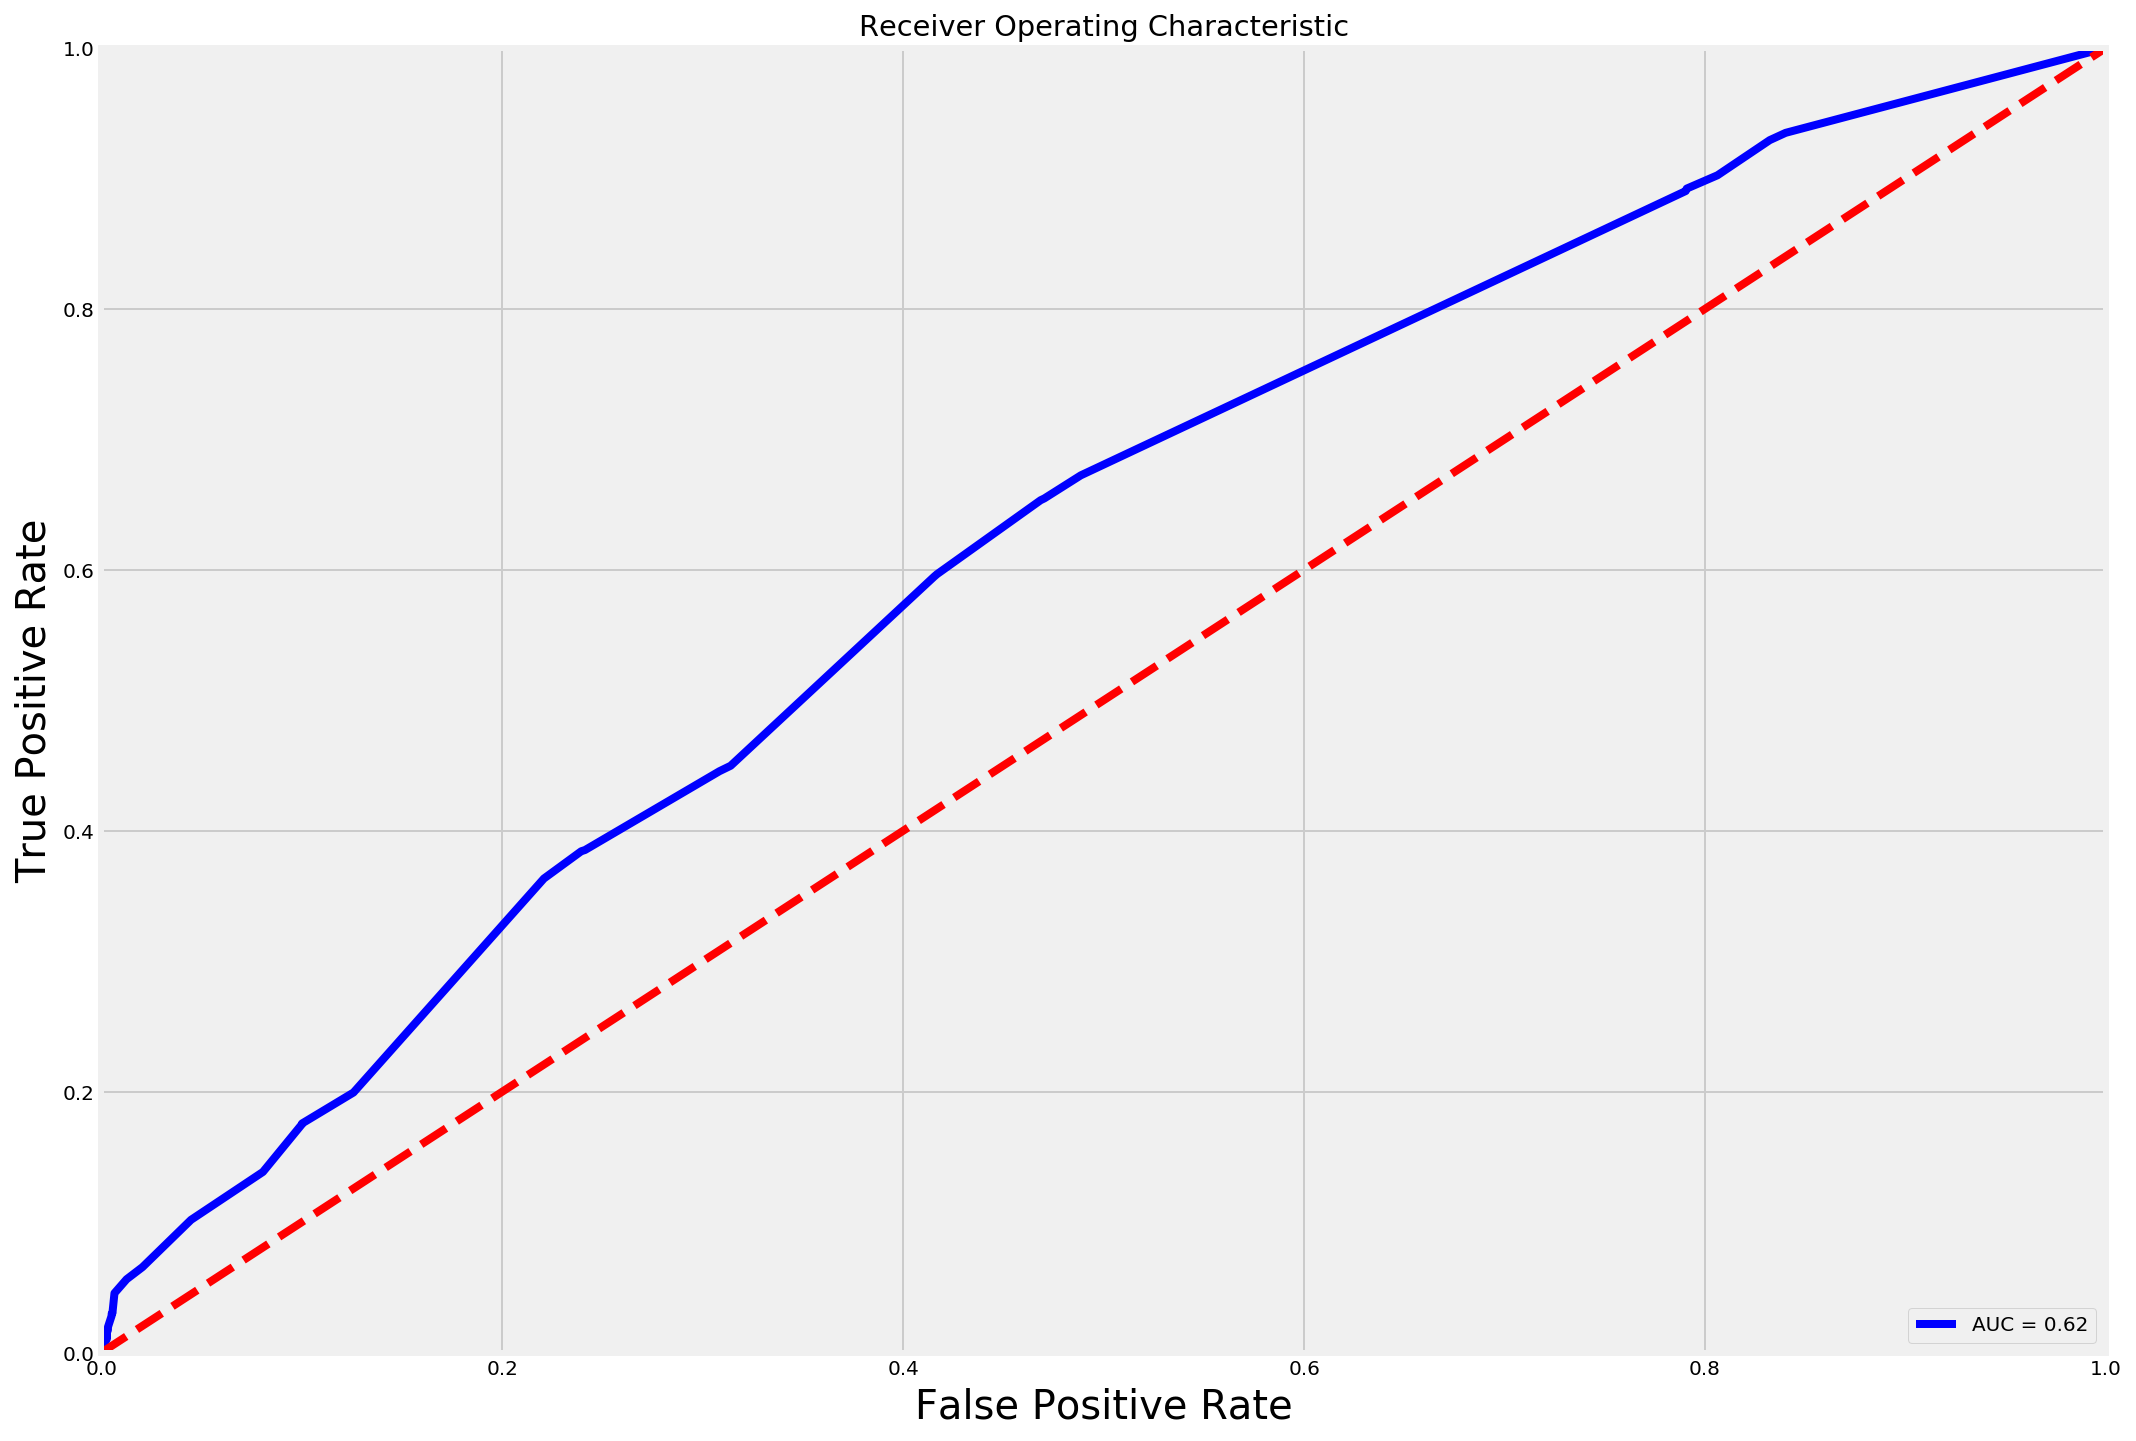

In [55]:
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics


probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[-0.08939275 -0.06049106  0.33883313  0.30918495  0.29717905 -0.06769174
   0.11646929 -0.05484061  0.05333792  0.19857542 -0.26672642]]
[0.0222041]
             precision    recall  f1-score   support

          0       0.60      0.61      0.61      2147
          1       0.60      0.59      0.60      2152

avg / total       0.60      0.60      0.60      4299



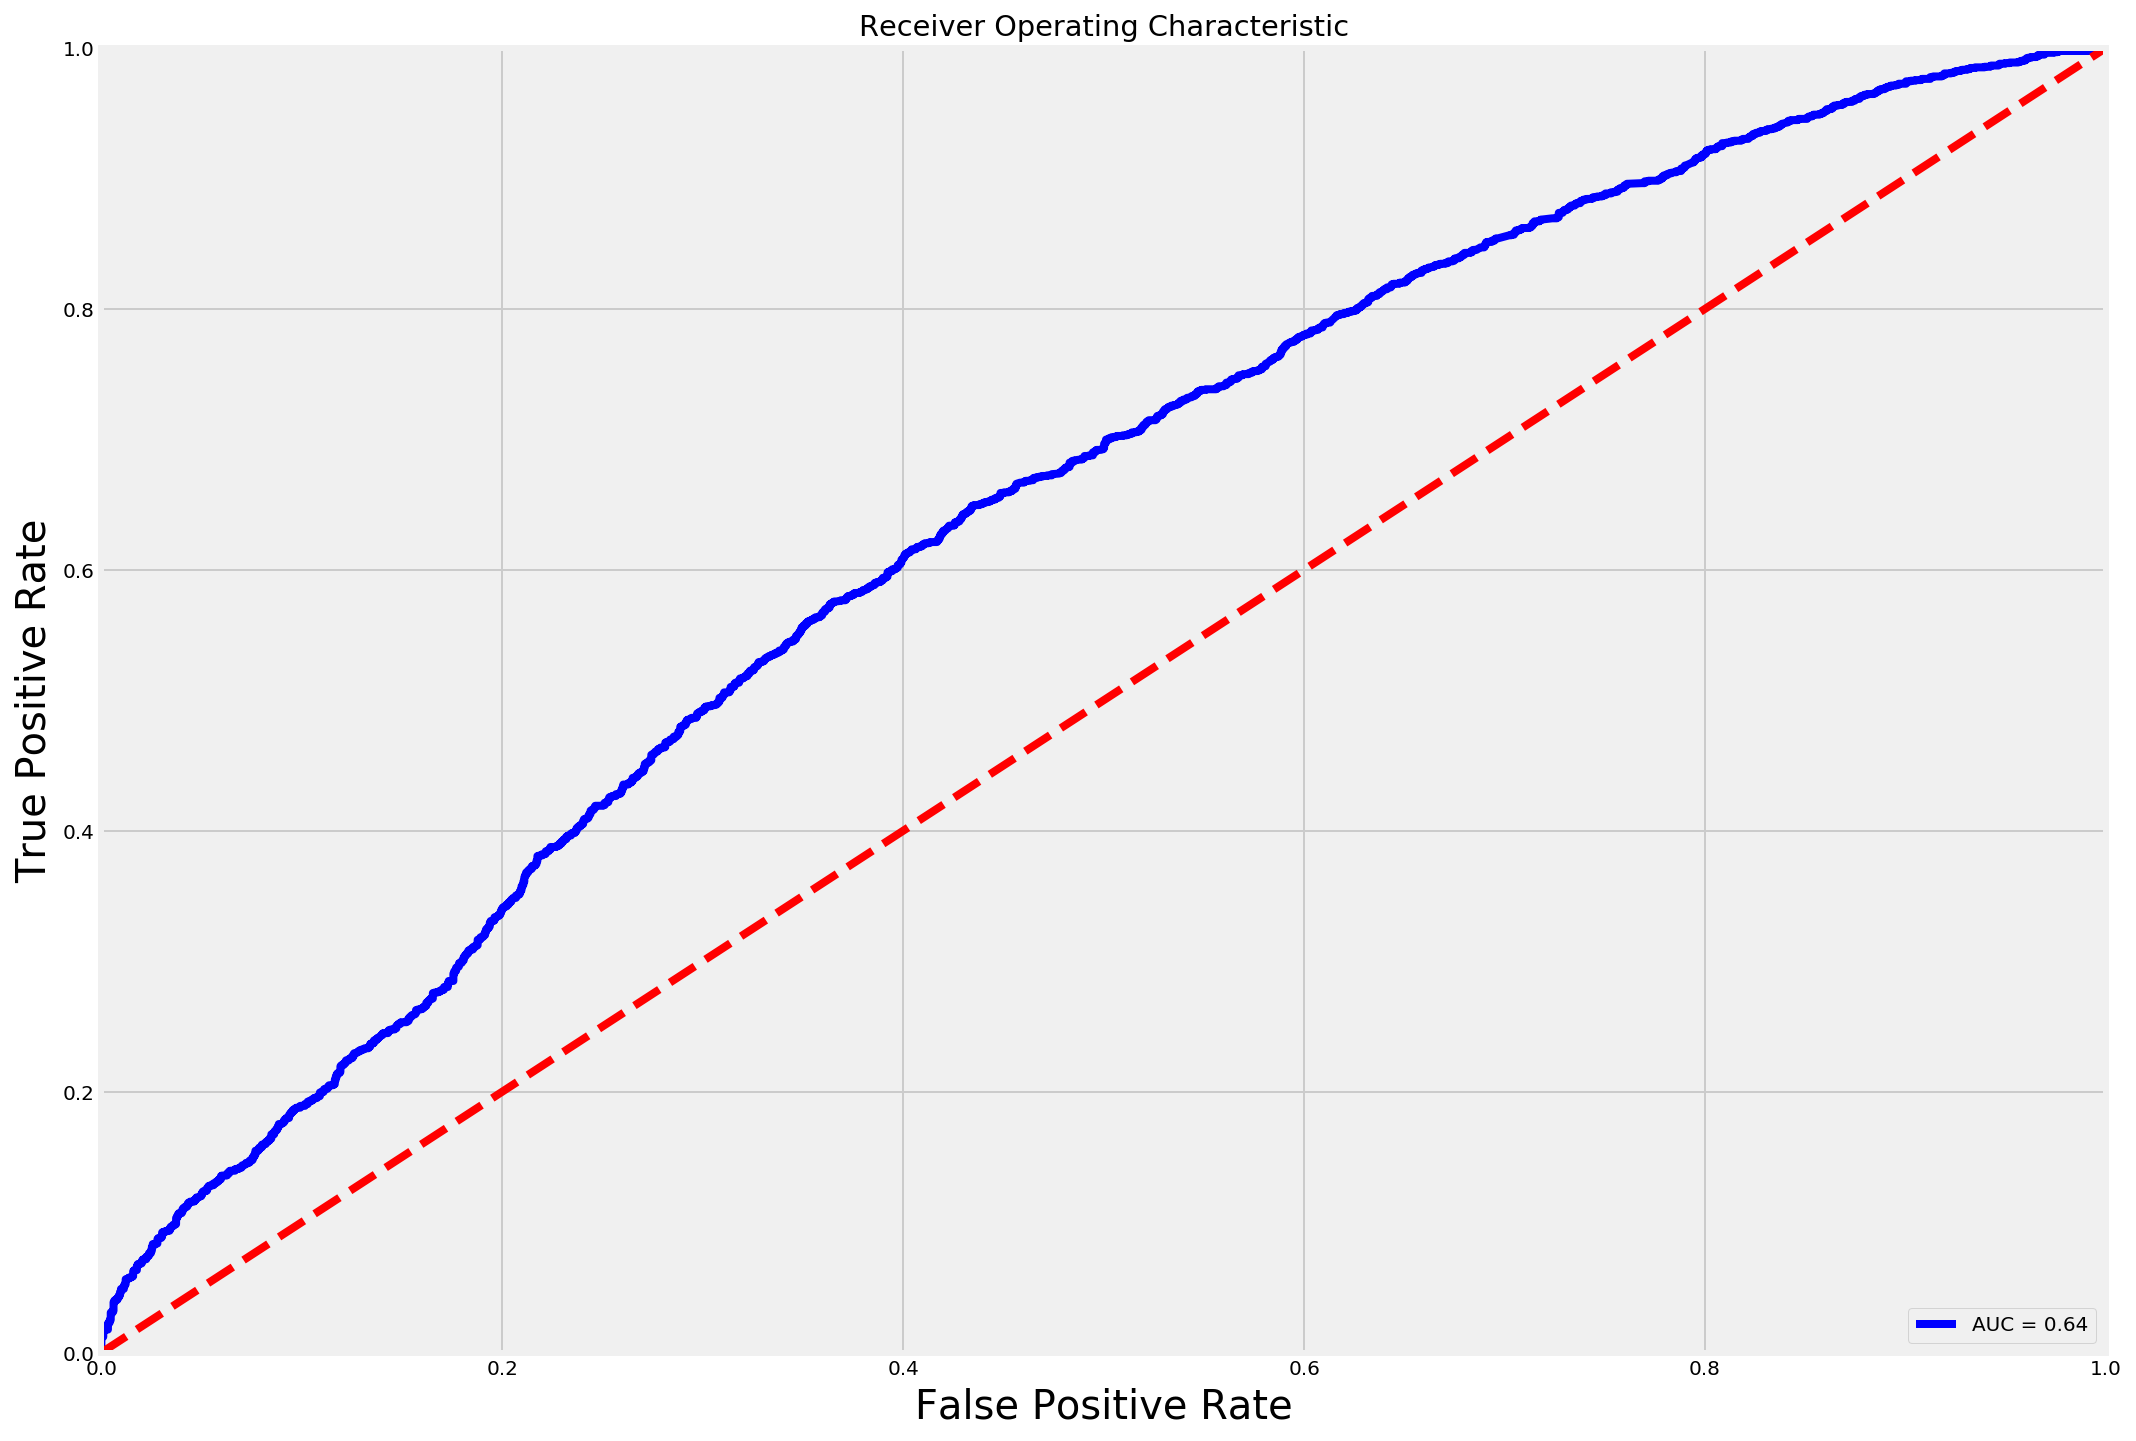

In [56]:
from sklearn.preprocessing import label_binarize
# EVENLY SAMPLED LOGISTIC WITH ALL FEATURES
#X & y are now arrays
X_2 = convert2.iloc[:,1:12].values
y_2 = convert2.iloc[:,12].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_2,y,test_size=0.50,random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

coef = classifier.coef_
print (coef)

intercept = classifier.intercept_
print (intercept)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

# Compute predicted probabilities: y_pred_prob
y_pred_prob = classifier.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics


probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
#PRINT FEATURE AND IT'S COEF
name = X_2

#coef = classifier.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,"[[1.0, 0.0, 0.0, 0.0, 5.0, 1.0, 0.0, 1.0, 0.0,...","[[-0.08939274884208082, -0.06049105971587425, ..."


In [58]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(classifier, X_2, y_2, cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.6375530696415678
AUC scores computed using 5-fold cross-validation: [0.62010005 0.64528259 0.67434348 0.65484812 0.65104773]
